In [360]:
import pandas as pd
import numpy as np

 ## Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


 ## Domain Analysis



 Domain Analysis of Bike Sharing Systems

Bike sharing systems have modernized traditional bike rentals by automating membership, rental, and return processes. These systems allow users to rent bikes from one location and return them to another with ease. There are over 500 bike-sharing programs globally, comprising more than half a million bicycles. These systems play a crucial role in addressing traffic congestion, environmental concerns, and public health.

 Importance in Traffic and Environmental Issues
Bike sharing systems alleviate traffic congestion by providing an alternative mode of transport. They reduce the reliance on cars, thereby decreasing emissions and promoting eco-friendly transportation.

Health Benefits
Encouraging cycling through these systems improves public health by promoting physical activity and reducing pollution-related illnesses.

Research Opportunities
The data generated by bike sharing systems offers valuable insights for research. Unlike other transport services like buses or subways, these systems record detailed travel data, including duration, departure, and arrival positions. This transforms bike sharing into a virtual sensor network, offering real-time data for urban mobility analysis. By monitoring this data, researchers can detect significant city events and analyze urban mobility patterns.

Technological Aspects
The automation involved in these systems ensures seamless bike rentals and returns, enhancing user convenience and operational efficiency.


In [364]:
day=pd.read_csv('day.csv')
day.head()

instant    dteday    season  yr  mnth  holiday  weekday  workingday  \
0     1     2011-01-01     1     0    1      0        6          0       
1     2     2011-01-02     1     0    1      0        0          0       
2     3     2011-01-03     1     0    1      0        1          1       
3     4     2011-01-04     1     0    1      0        2          1       
4     5     2011-01-05     1     0    1      0        3          1       

   weathersit    temp      atemp      hum    windspeed  casual  registered  \
0       2      0.344167  0.363625  0.805833  0.160446     331       654      
1       2      0.363478  0.353739  0.696087  0.248539     131       670      
2       1      0.196364  0.189405  0.437273  0.248309     120      1229      
3       1      0.200000  0.212122  0.590435  0.160296     108      1454      
4       1      0.226957  0.229270  0.436957  0.186900      82      1518      

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [365]:
day.shape

(731, 16)

In [366]:
hour = pd.read_csv('hour.csv')
hour.head()

instant    dteday    season  yr  mnth  hr  holiday  weekday  workingday  \
0     1     2011-01-01     1     0    1    0     0        6          0       
1     2     2011-01-01     1     0    1    1     0        6          0       
2     3     2011-01-01     1     0    1    2     0        6          0       
3     4     2011-01-01     1     0    1    3     0        6          0       
4     5     2011-01-01     1     0    1    4     0        6          0       

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0       1      0.24  0.2879  0.81     0.0        3        13      16   
1       1      0.22  0.2727  0.80     0.0        8        32      40   
2       1      0.22  0.2727  0.80     0.0        5        27      32   
3       1      0.24  0.2879  0.75     0.0        3        10      13   
4       1      0.24  0.2879  0.75     0.0        0         1       1

In [367]:
hour['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [368]:
hour.shape

(17379, 17)

 # info check 

In [370]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Null values 

In [372]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values in day dataframe

# duplicates

In [375]:
day.duplicated().sum()

0

No duplicate values in data set 

# describe

In [378]:
day.describe()

instant     season        yr         mnth       holiday     weekday   \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit     temp        atemp        hum      windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

         casual     registered       cnt      
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

Seasonal Trends: Bike usage likely varies significantly across seasons. This could be due to temperature changes, weather conditions, and daylight availability.

Year Comparison: Analyzing the differences between the two years can shed light on trends or changes in bike-sharing usage.

Holidays and Working Days: These factors significantly influence bike usage patterns. Fewer rides may occur on holidays and non-working days.

Weather Impact: Weather plays a crucial role in daily bike rentals. Clear to misty weather is predominant, which may correlate with higher rental counts.

Temperature and Humidity: These are critical factors affecting rider comfort and, consequently, usage patterns.

In [380]:
day['hum'].unique()

array([0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261,
       0.498696, 0.535833, 0.434167, 0.482917, 0.686364, 0.599545,
       0.470417, 0.537826, 0.49875 , 0.48375 , 0.5375  , 0.861667,
       0.741739, 0.538333, 0.457083, 0.4     , 0.436522, 0.491739,
       0.616957, 0.8625  , 0.6875  , 0.793043, 0.651739, 0.722174,
       0.60375 , 0.829565, 0.775417, 0.437826, 0.585217, 0.929167,
       0.568333, 0.738333, 0.537917, 0.494783, 0.437391, 0.506364,
       0.544167, 0.457391, 0.375833, 0.314348, 0.423478, 0.505   ,
       0.516667, 0.187917, 0.407826, 0.605   , 0.577778, 0.423043,
       0.697391, 0.712174, 0.68    , 0.876364, 0.535   , 0.449583,
       0.318333, 0.610417, 0.789167, 0.948261, 0.551304, 0.420833,
       0.      , 0.649565, 0.594583, 0.527391, 0.496957, 0.655652,
       0.776522, 0.602917, 0.525217, 0.379167, 0.47375 , 0.737391,
       0.624583, 0.839565, 0.495   , 0.394167, 0.493913, 0.302174,
       0.314167, 0.646667, 0.918333, 0.68625 , 0.65375 , 0.48 

In [381]:
day[day['hum']<0.30]

instant    dteday    season  yr  mnth  holiday  weekday  workingday  \
49      50    2011-02-19     1     0    2      0        6          0       
68      69    2011-03-10     1     0    3      0        4          1       
451    452    2012-03-27     2     1    3      0        2          1       
462    463    2012-04-07     2     1    4      0        6          0       
463    464    2012-04-08     2     1    4      0        0          0       

     weathersit    temp      atemp      hum    windspeed  casual  registered  \
49        1      0.399167  0.391404  0.187917  0.507463     532      1103      
68        3      0.389091  0.385668  0.000000  0.261877      46       577      
451       1      0.323333  0.315654  0.290000  0.187192     531      4571      
462       1      0.437500  0.426129  0.254167  0.274871    3252      3605      
463       1      0.500000  0.492425  0.275833  0.232596    2230      2939      

      cnt  
49   1635  
68    623  
451  5102  
462  6857  
463  5169

In [382]:
hour.head()

instant    dteday    season  yr  mnth  hr  holiday  weekday  workingday  \
0     1     2011-01-01     1     0    1    0     0        6          0       
1     2     2011-01-01     1     0    1    1     0        6          0       
2     3     2011-01-01     1     0    1    2     0        6          0       
3     4     2011-01-01     1     0    1    3     0        6          0       
4     5     2011-01-01     1     0    1    4     0        6          0       

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0       1      0.24  0.2879  0.81     0.0        3        13      16   
1       1      0.22  0.2727  0.80     0.0        8        32      40   
2       1      0.22  0.2727  0.80     0.0        5        27      32   
3       1      0.24  0.2879  0.75     0.0        3        10      13   
4       1      0.24  0.2879  0.75     0.0        0         1       1

In [383]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [384]:
hour.duplicated().sum()

0

In [385]:
hour.describe()

instant      season          yr           mnth           hr       \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

          holiday       weekday     workingday    weathersit       temp      \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

           atemp          hum        windspeed      casual      registered   \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

            cnt      
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

# EDA

In [387]:
import sweetviz as sv

In [388]:
# Analyze the dataset
report = sv.analyze(day)

# Generate the report
report.show_html('sweetviz_report.html')


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [389]:
day['dteday'] = pd.to_datetime(day['dteday'])


In [390]:
print(day['dteday'].dtype)

datetime64[ns]


Shape of your Data Set loaded: (731, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    16 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['instant']
To fix these data quality issues in the dataset, import F

Number of All Scatter Plots = 10


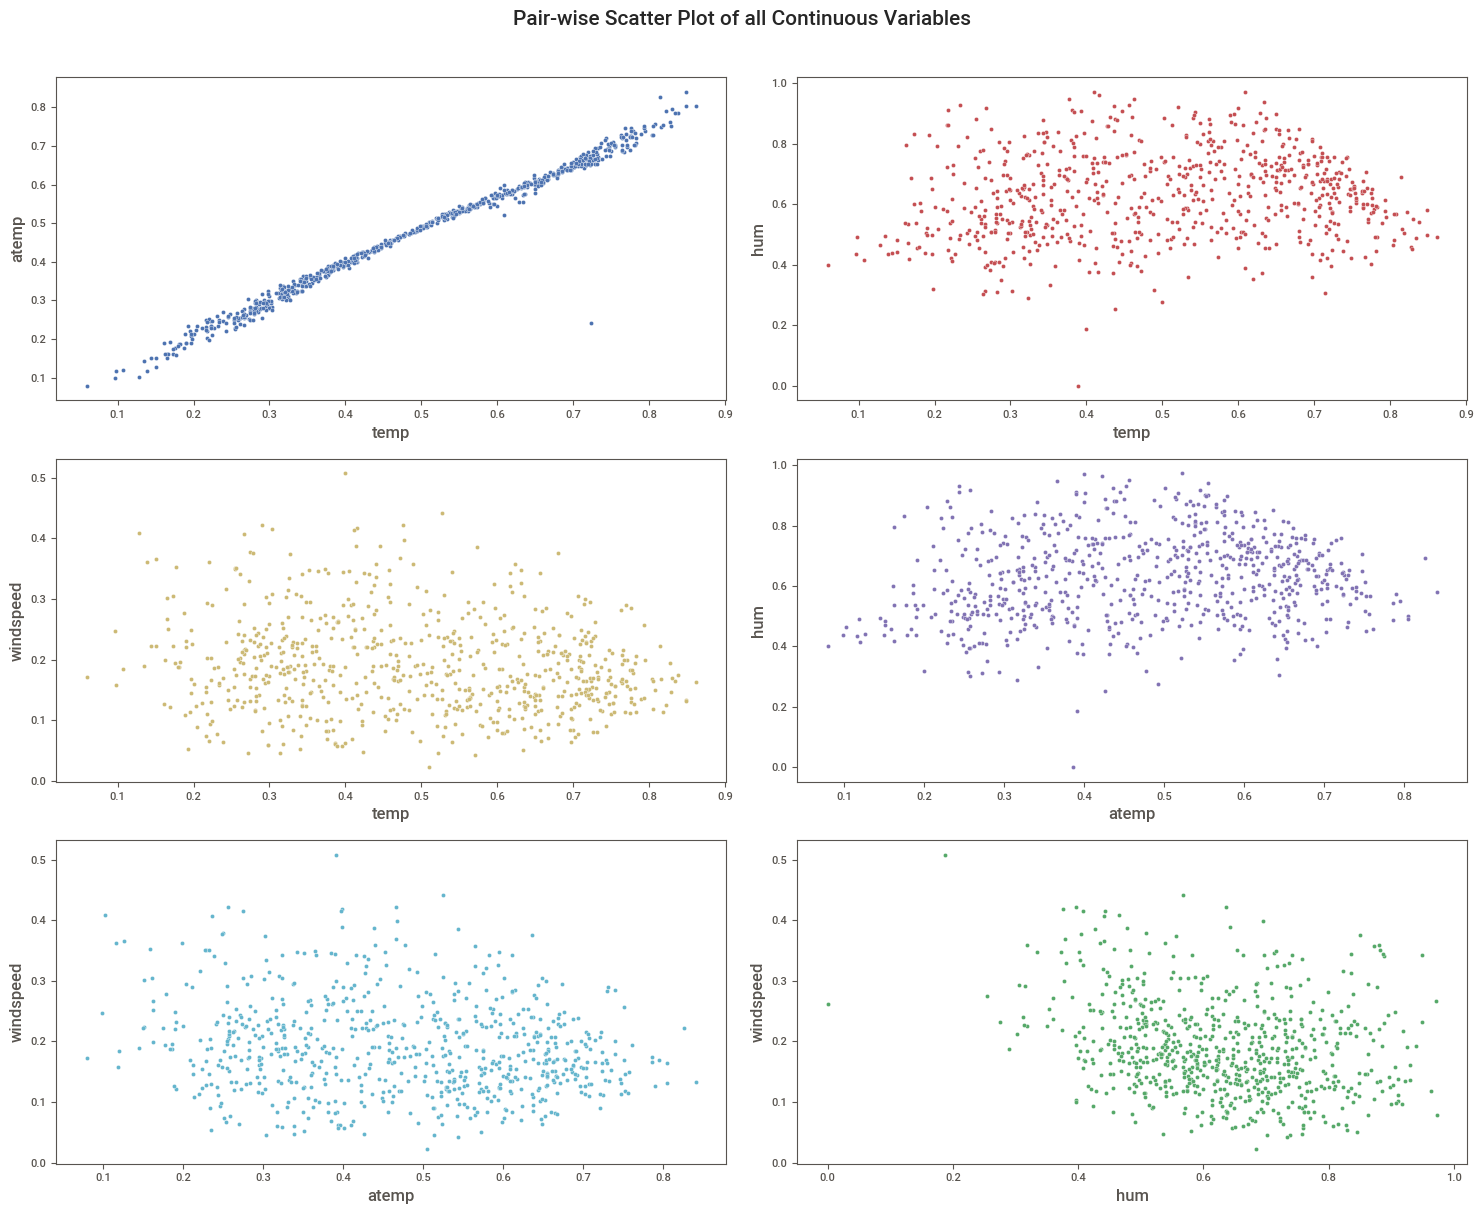

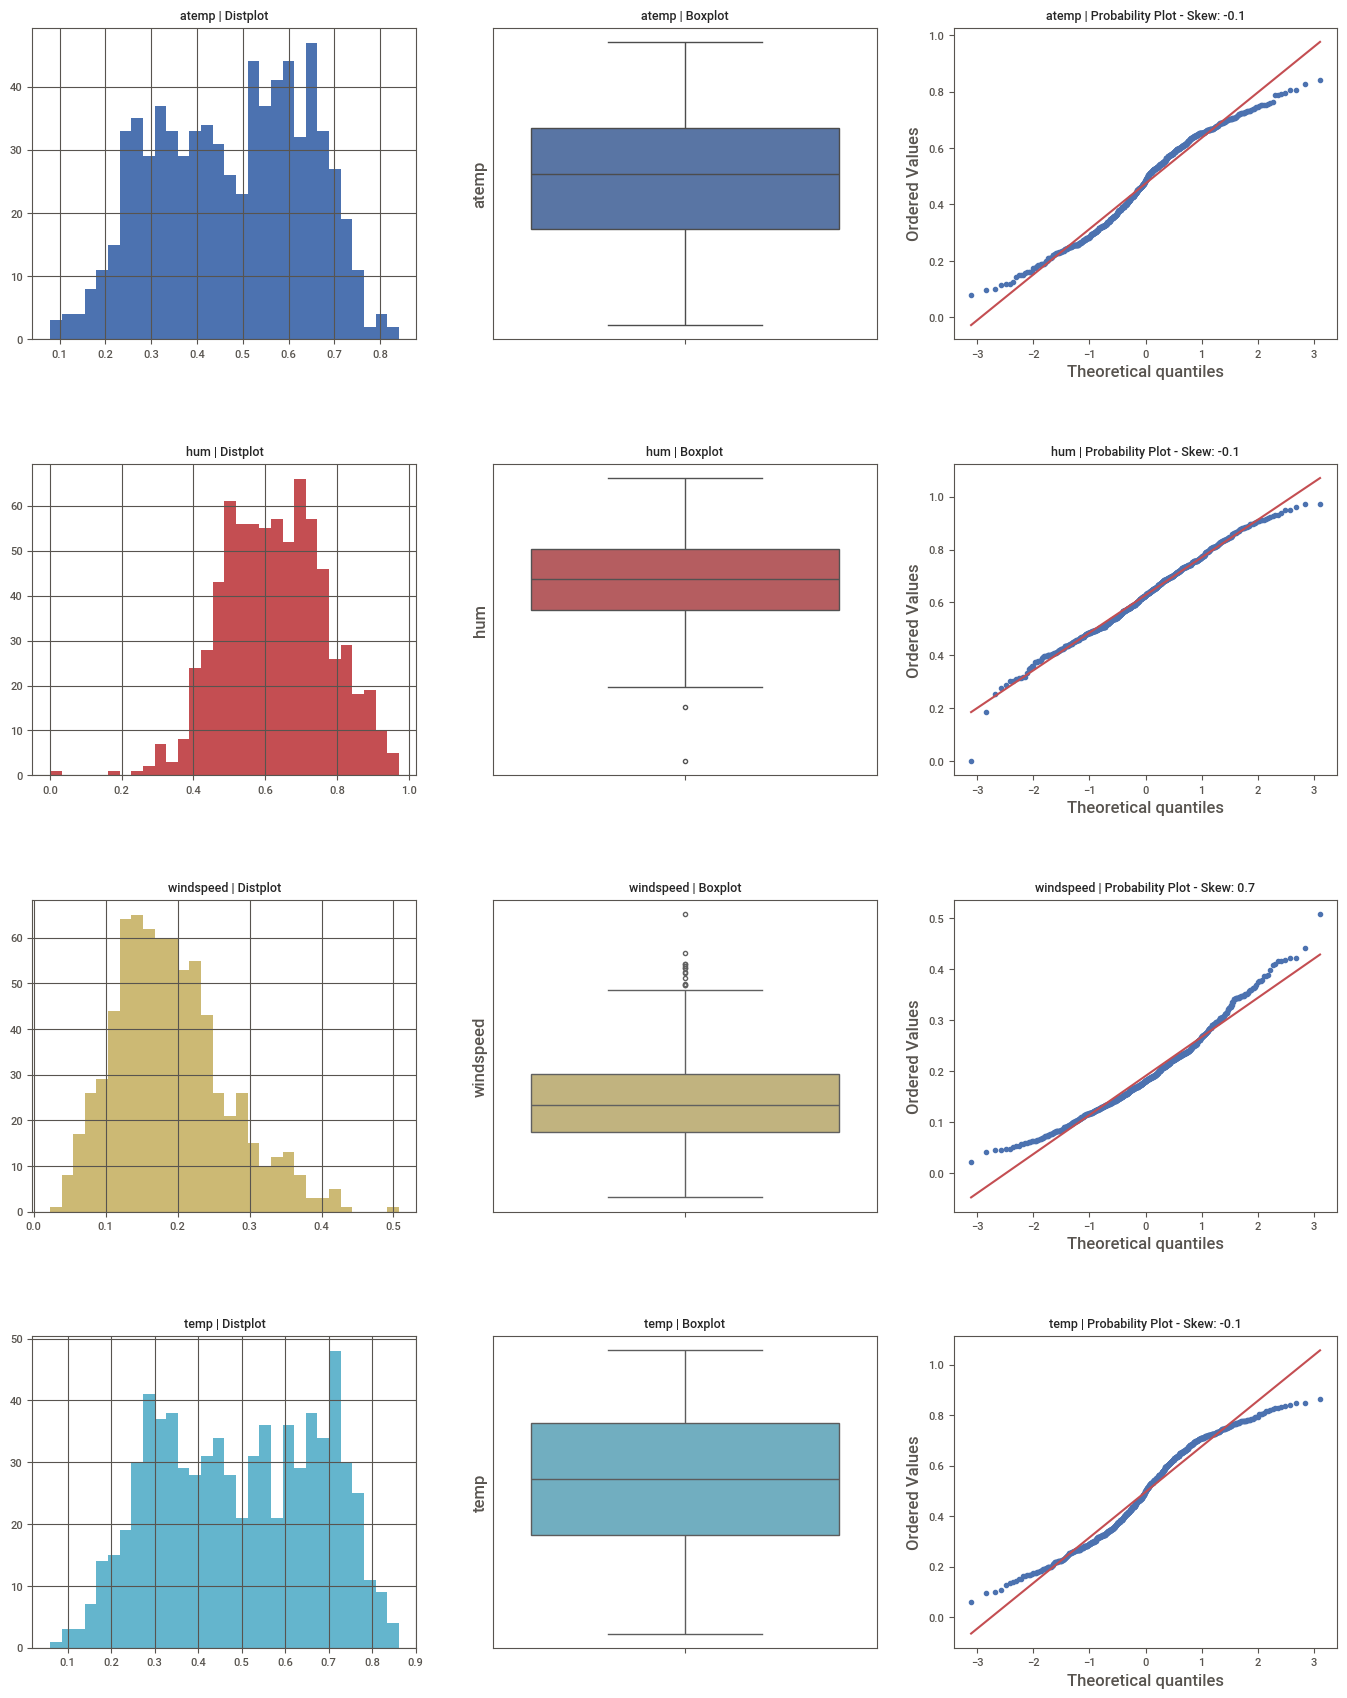

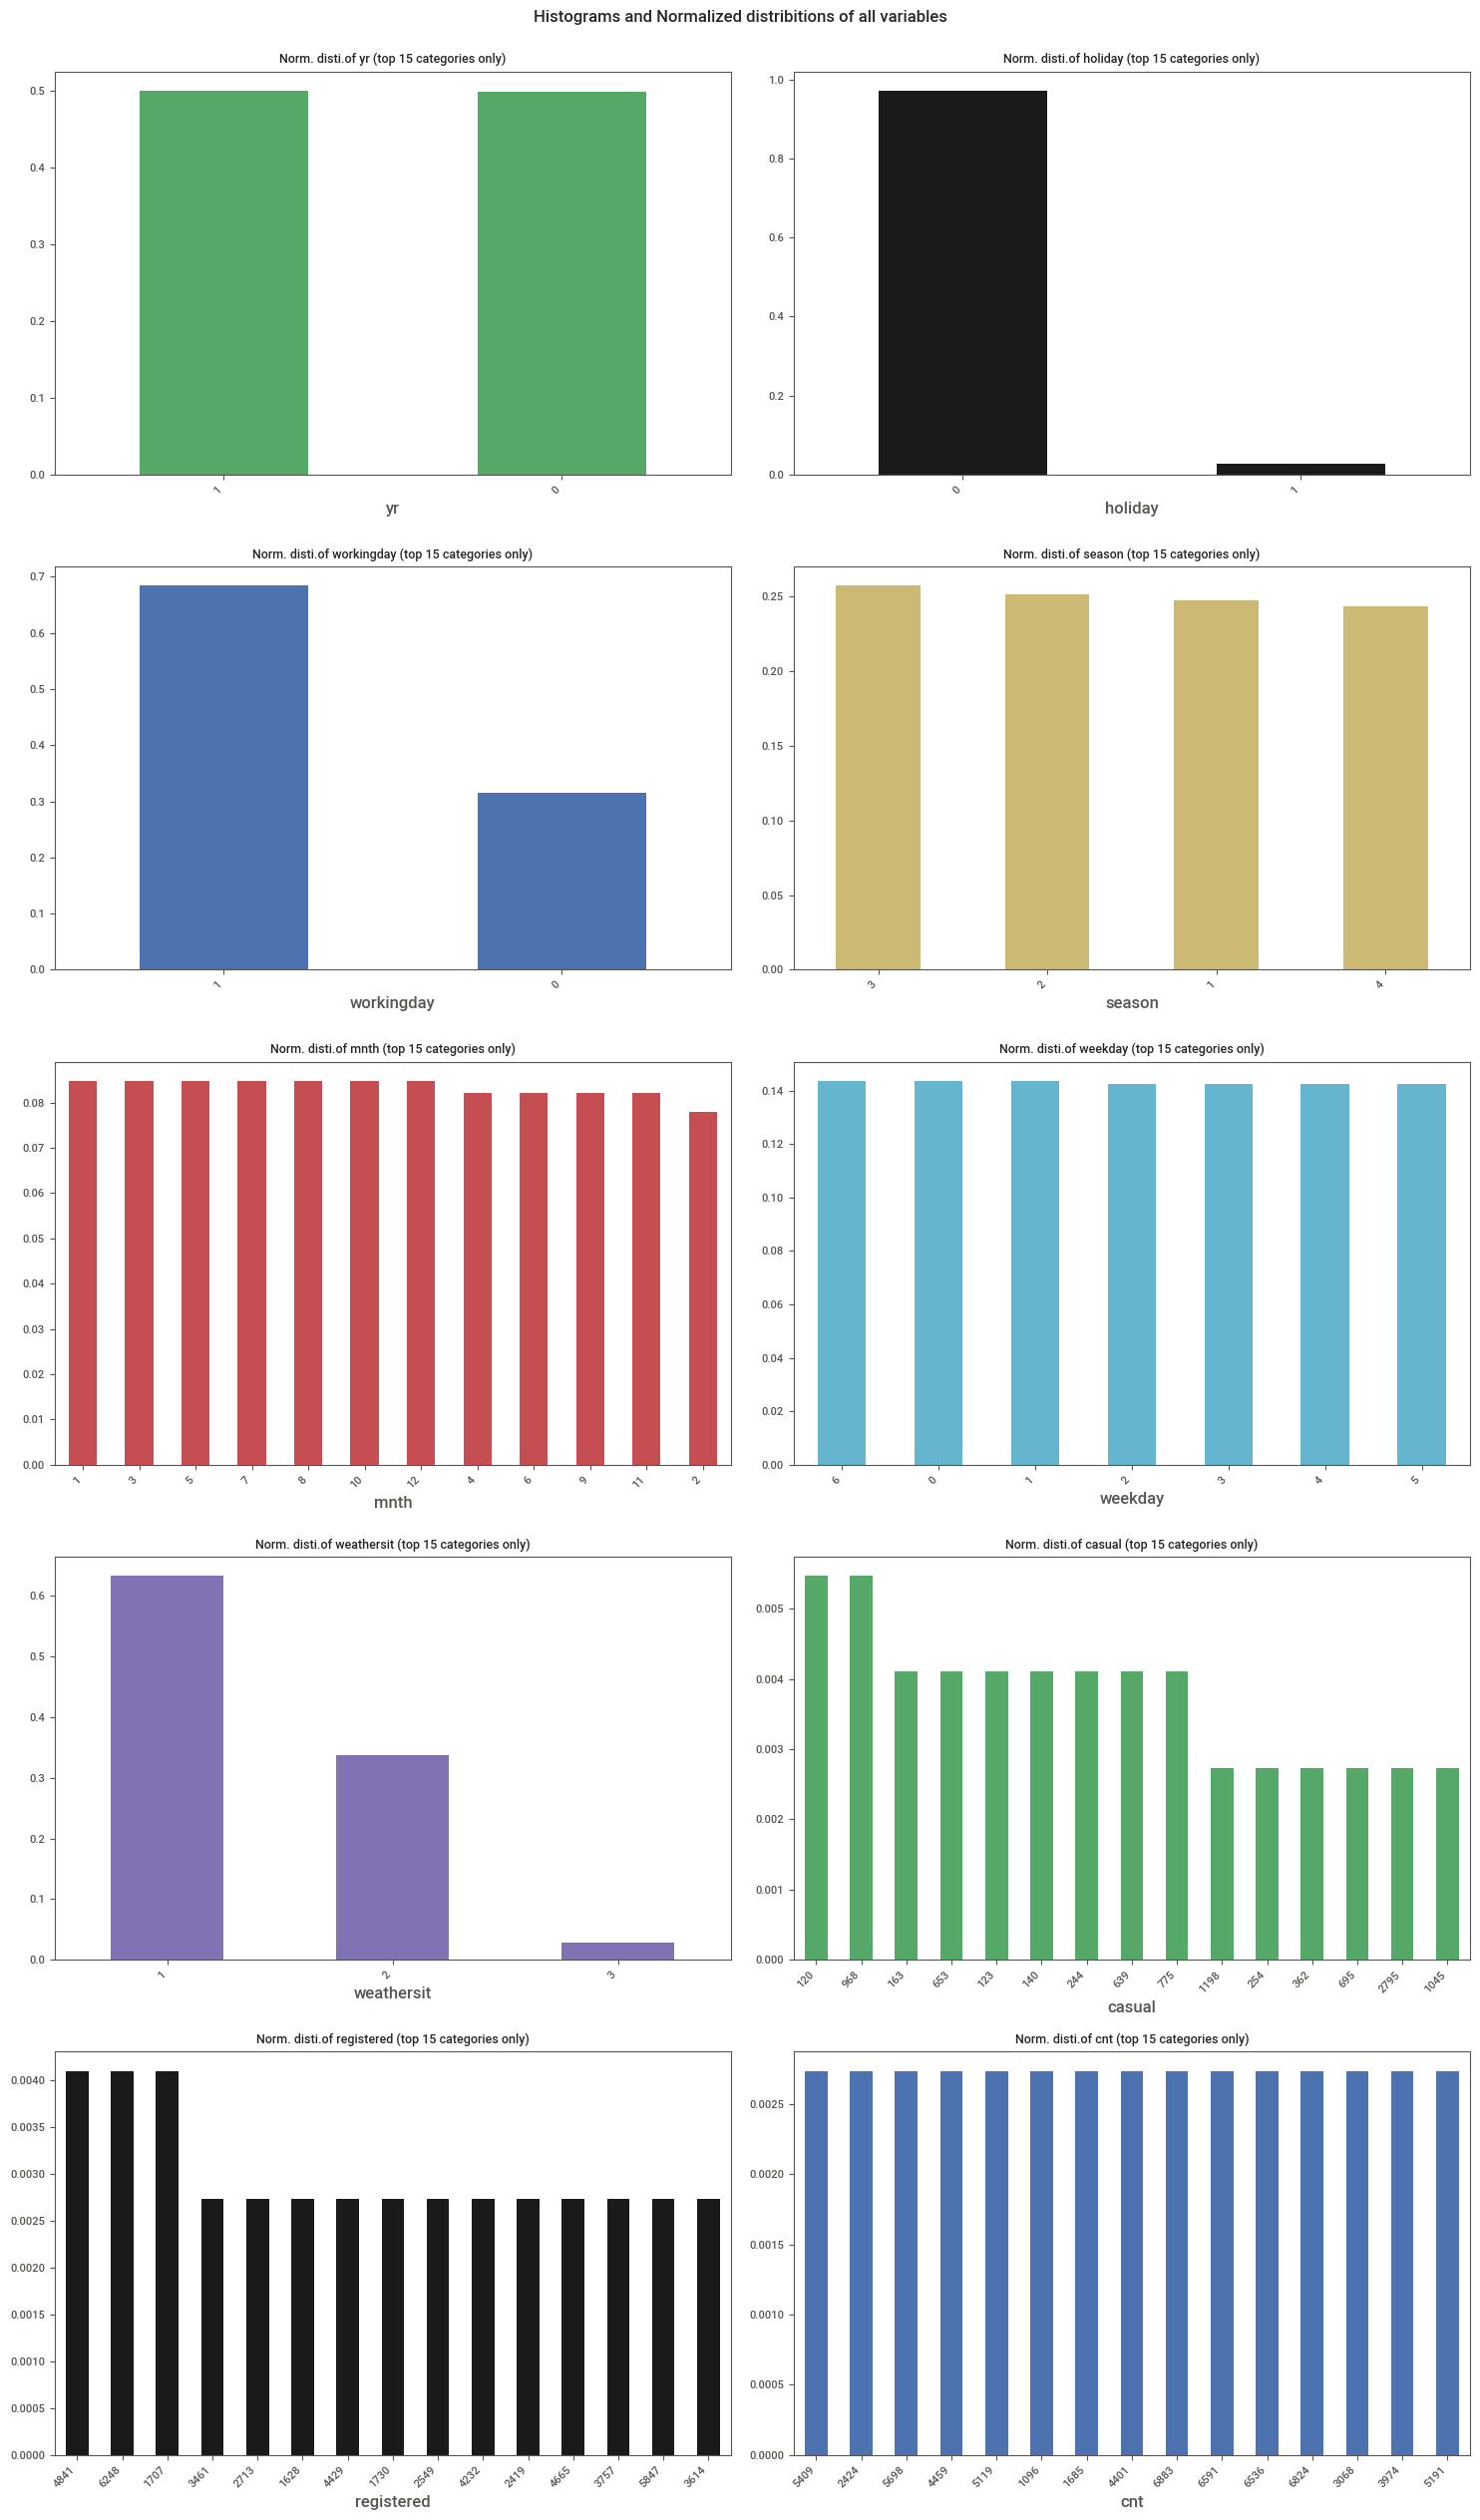

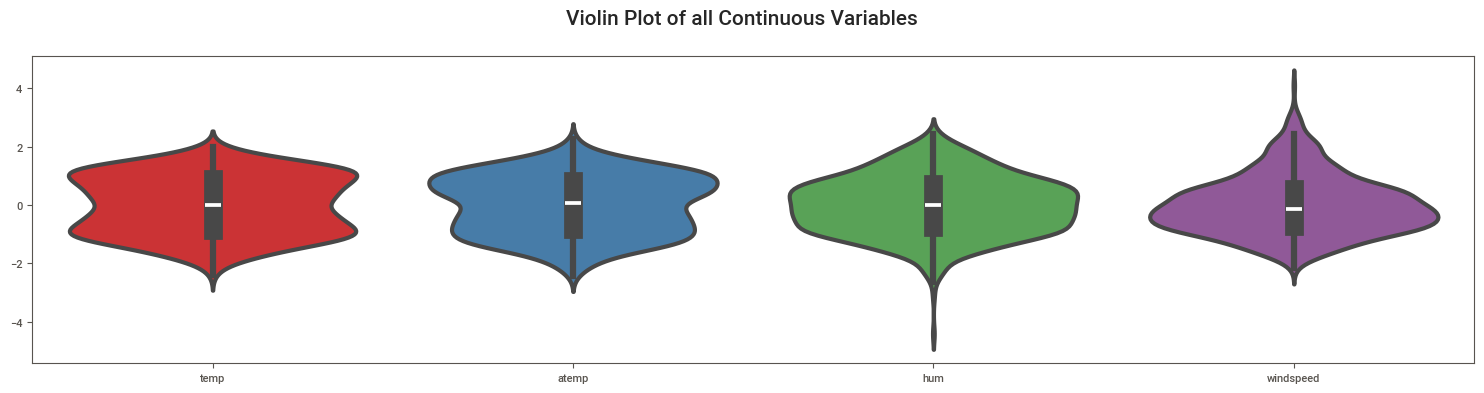

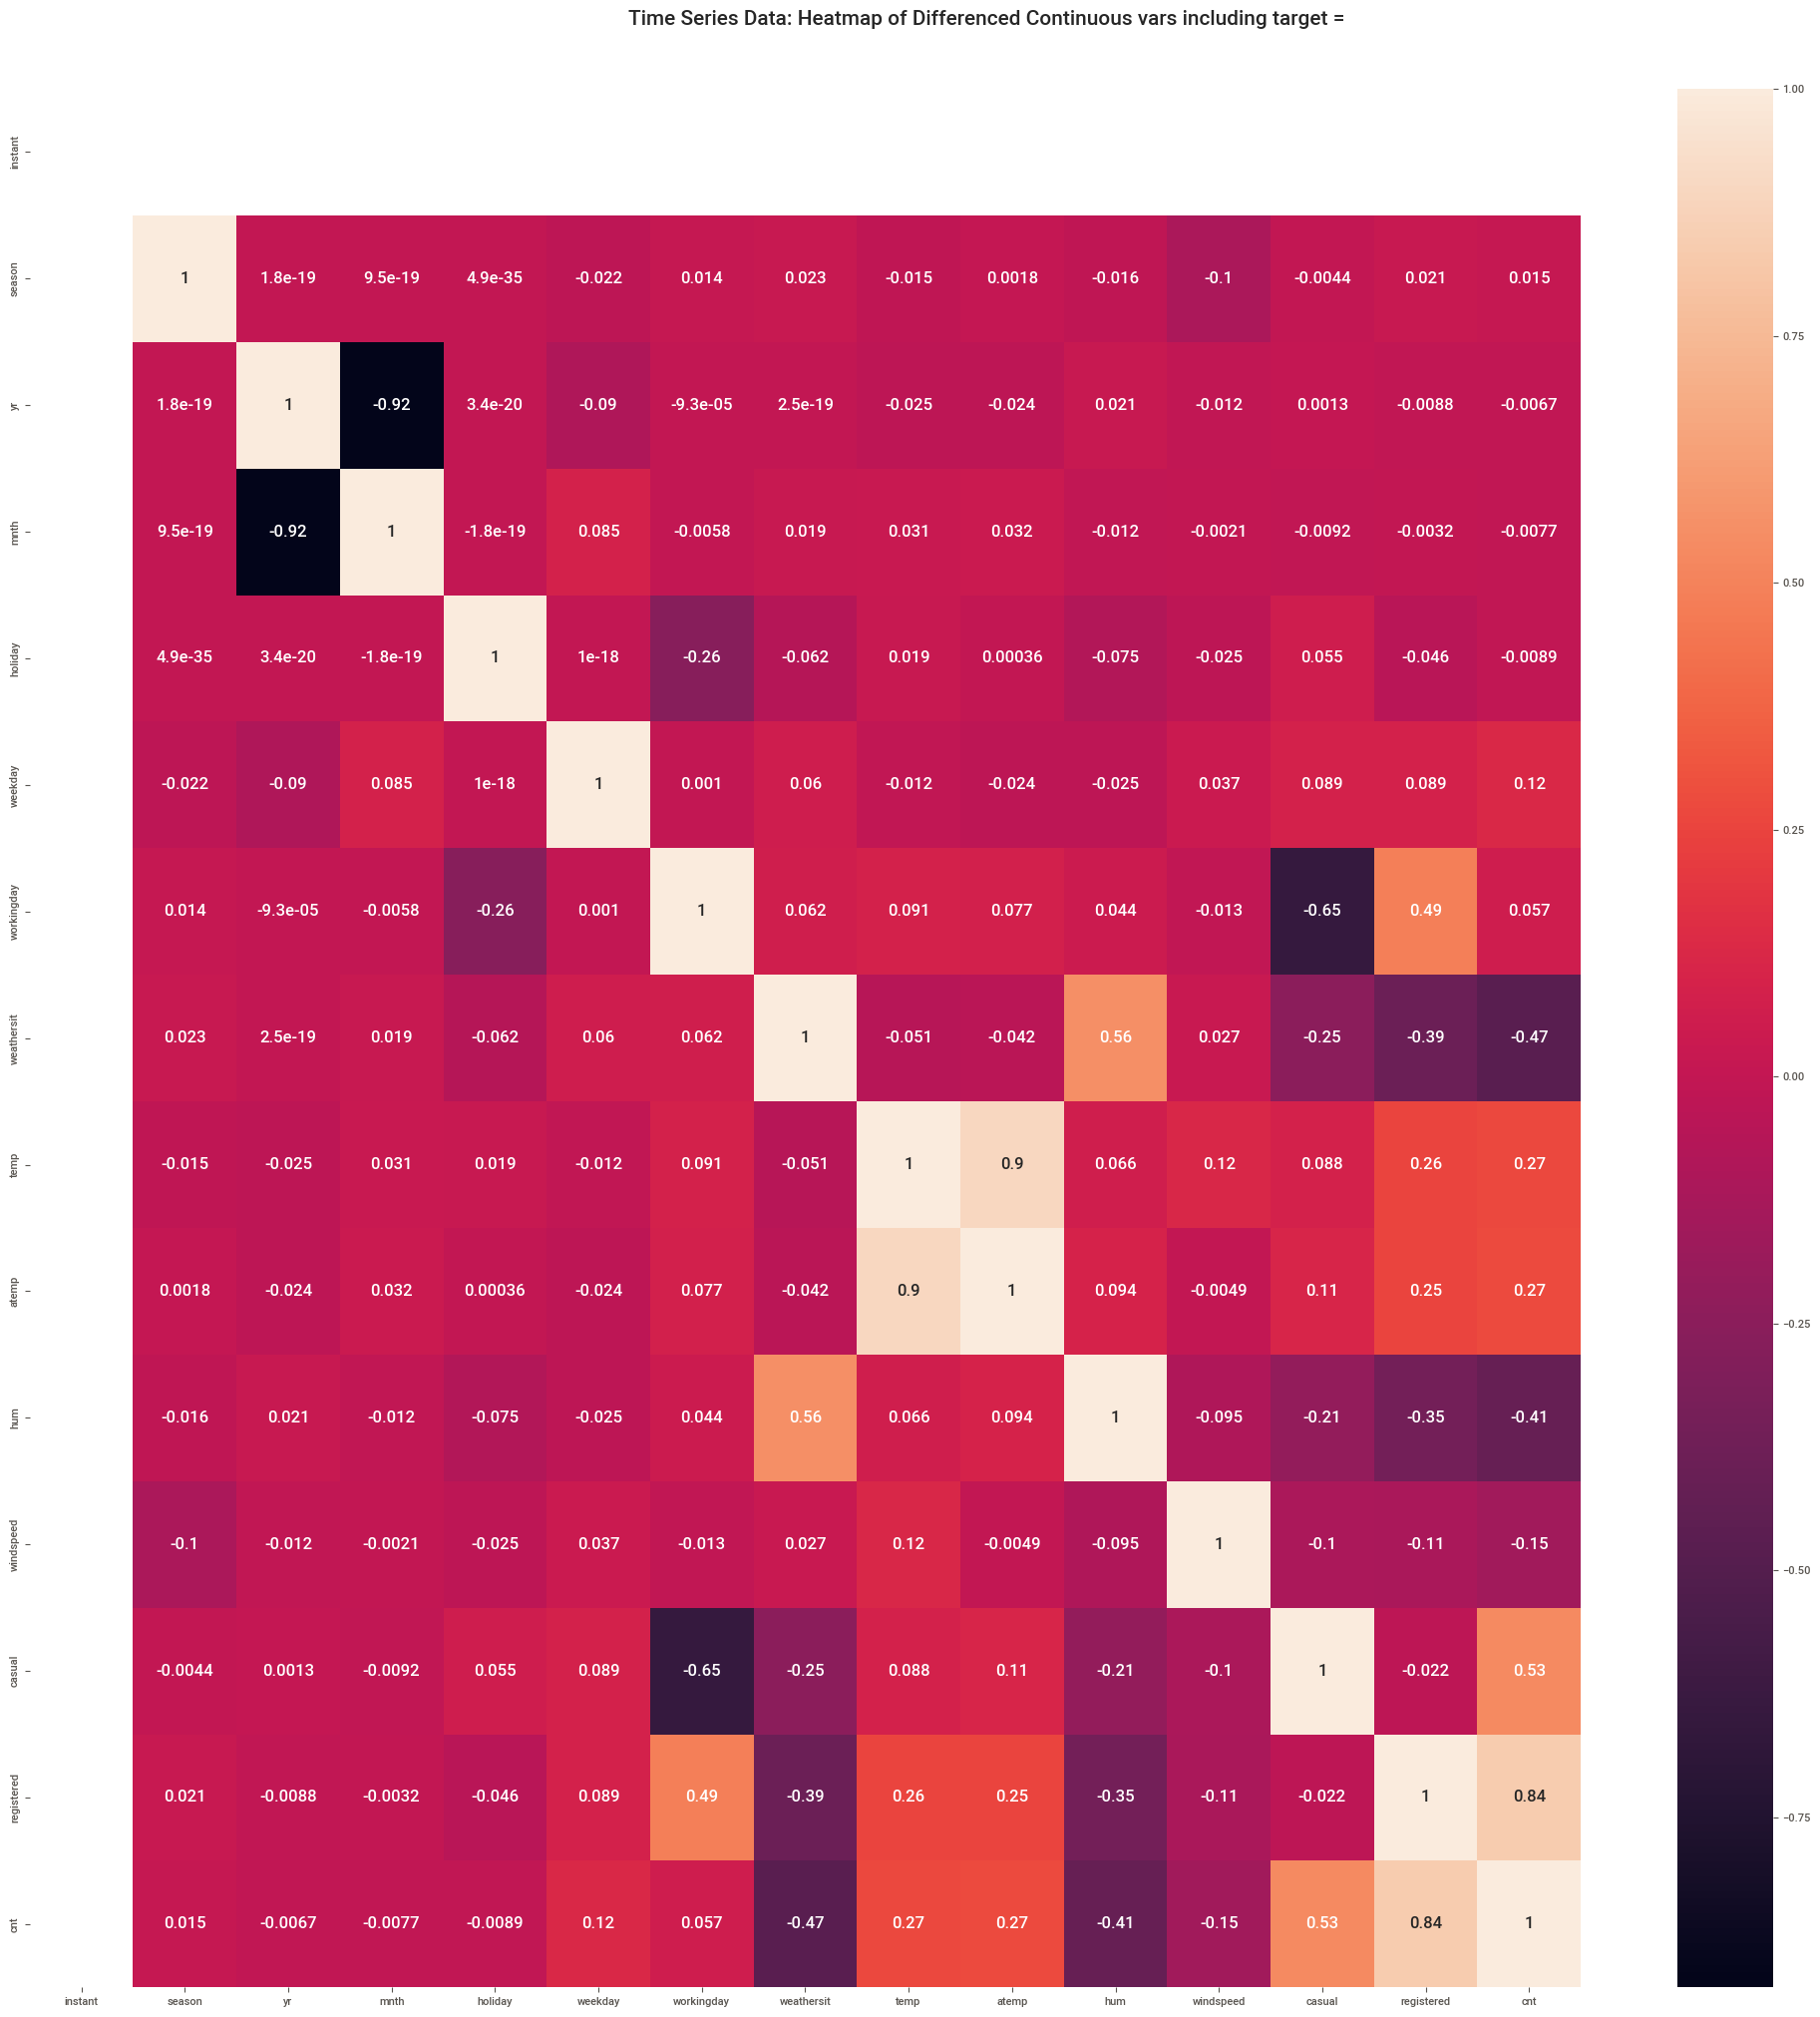

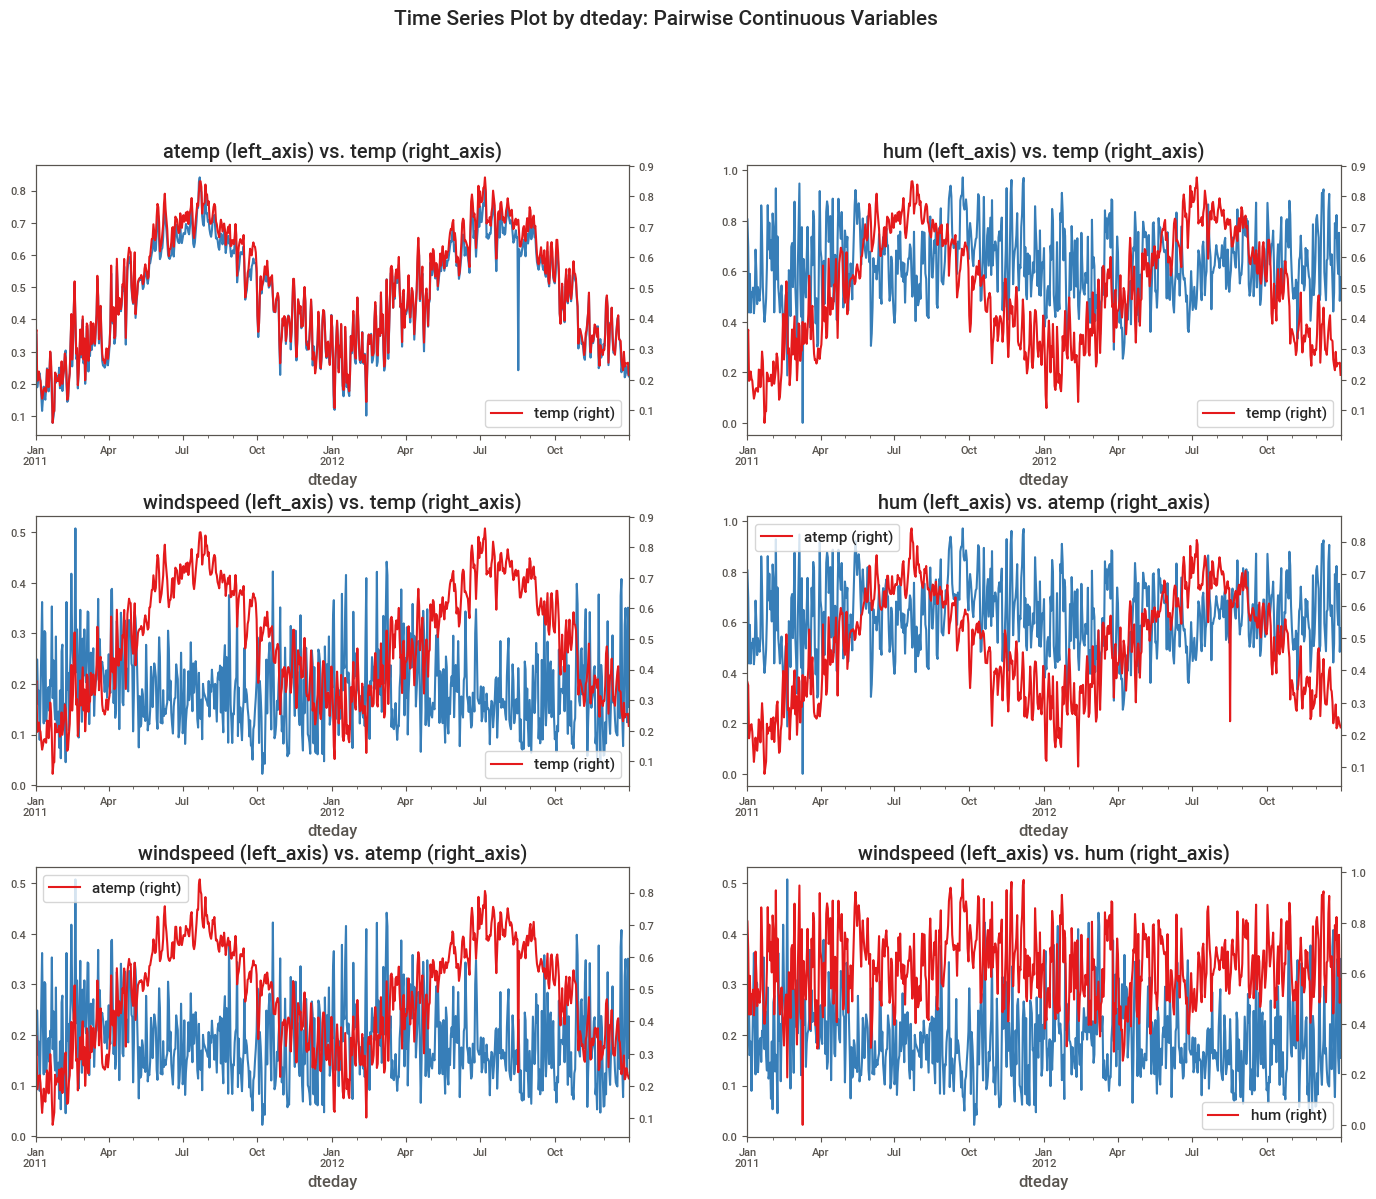

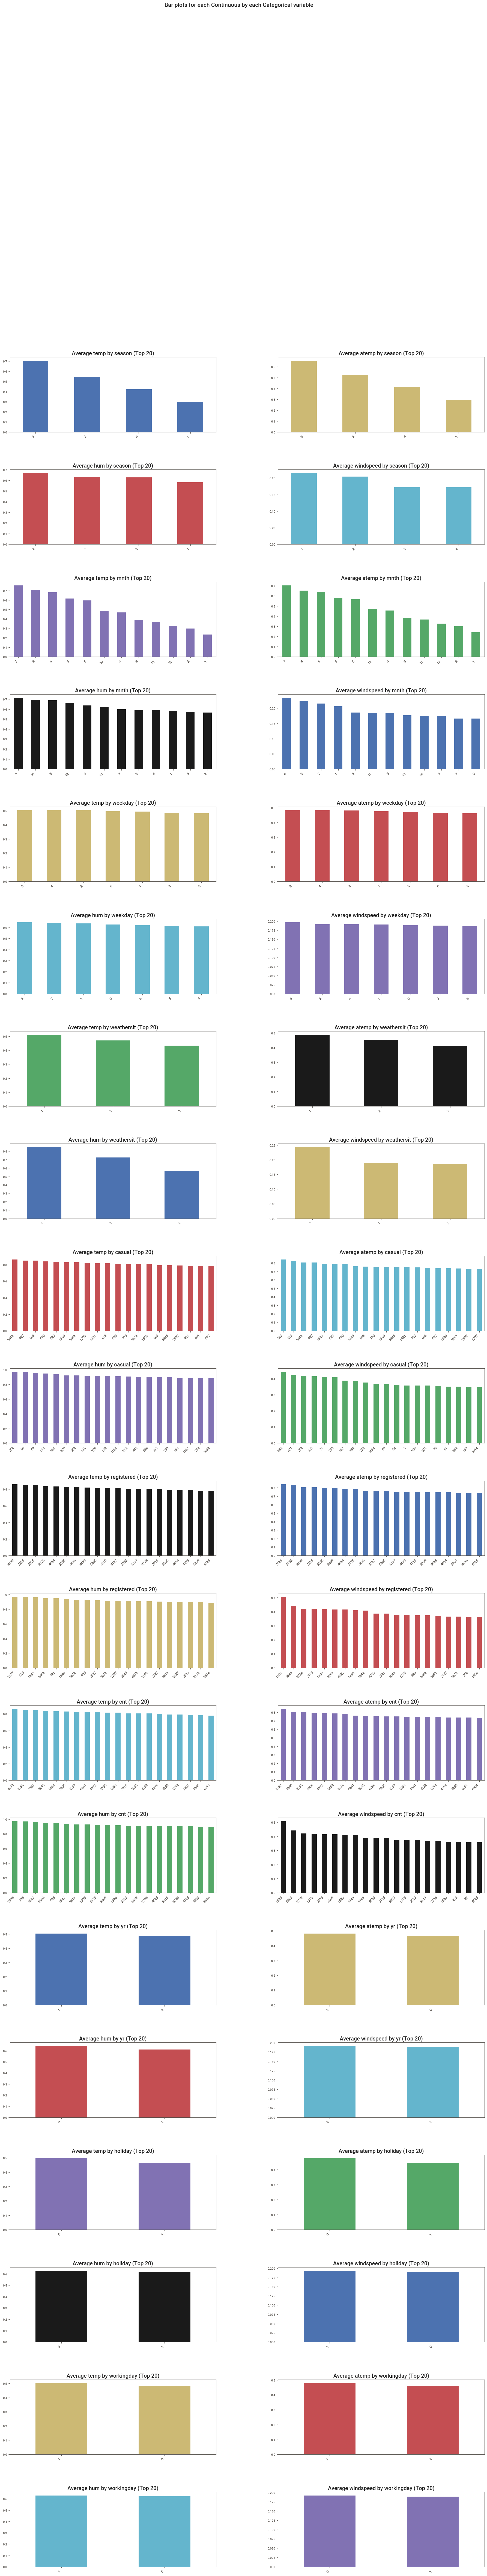

All Plots done
Time to run AutoViz = 24 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [391]:
from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd

# Load dataset

# Initialize AutoViz
AV = AutoViz_Class()

# Perform EDA
visualizations = AV.AutoViz('', dfte=day)


# there is no need of intant and dteday feature because instant  is the id or numbers and dteday are dates  so dropping them 

In [393]:
day2=day.drop(['instant','dteday'],axis=1)

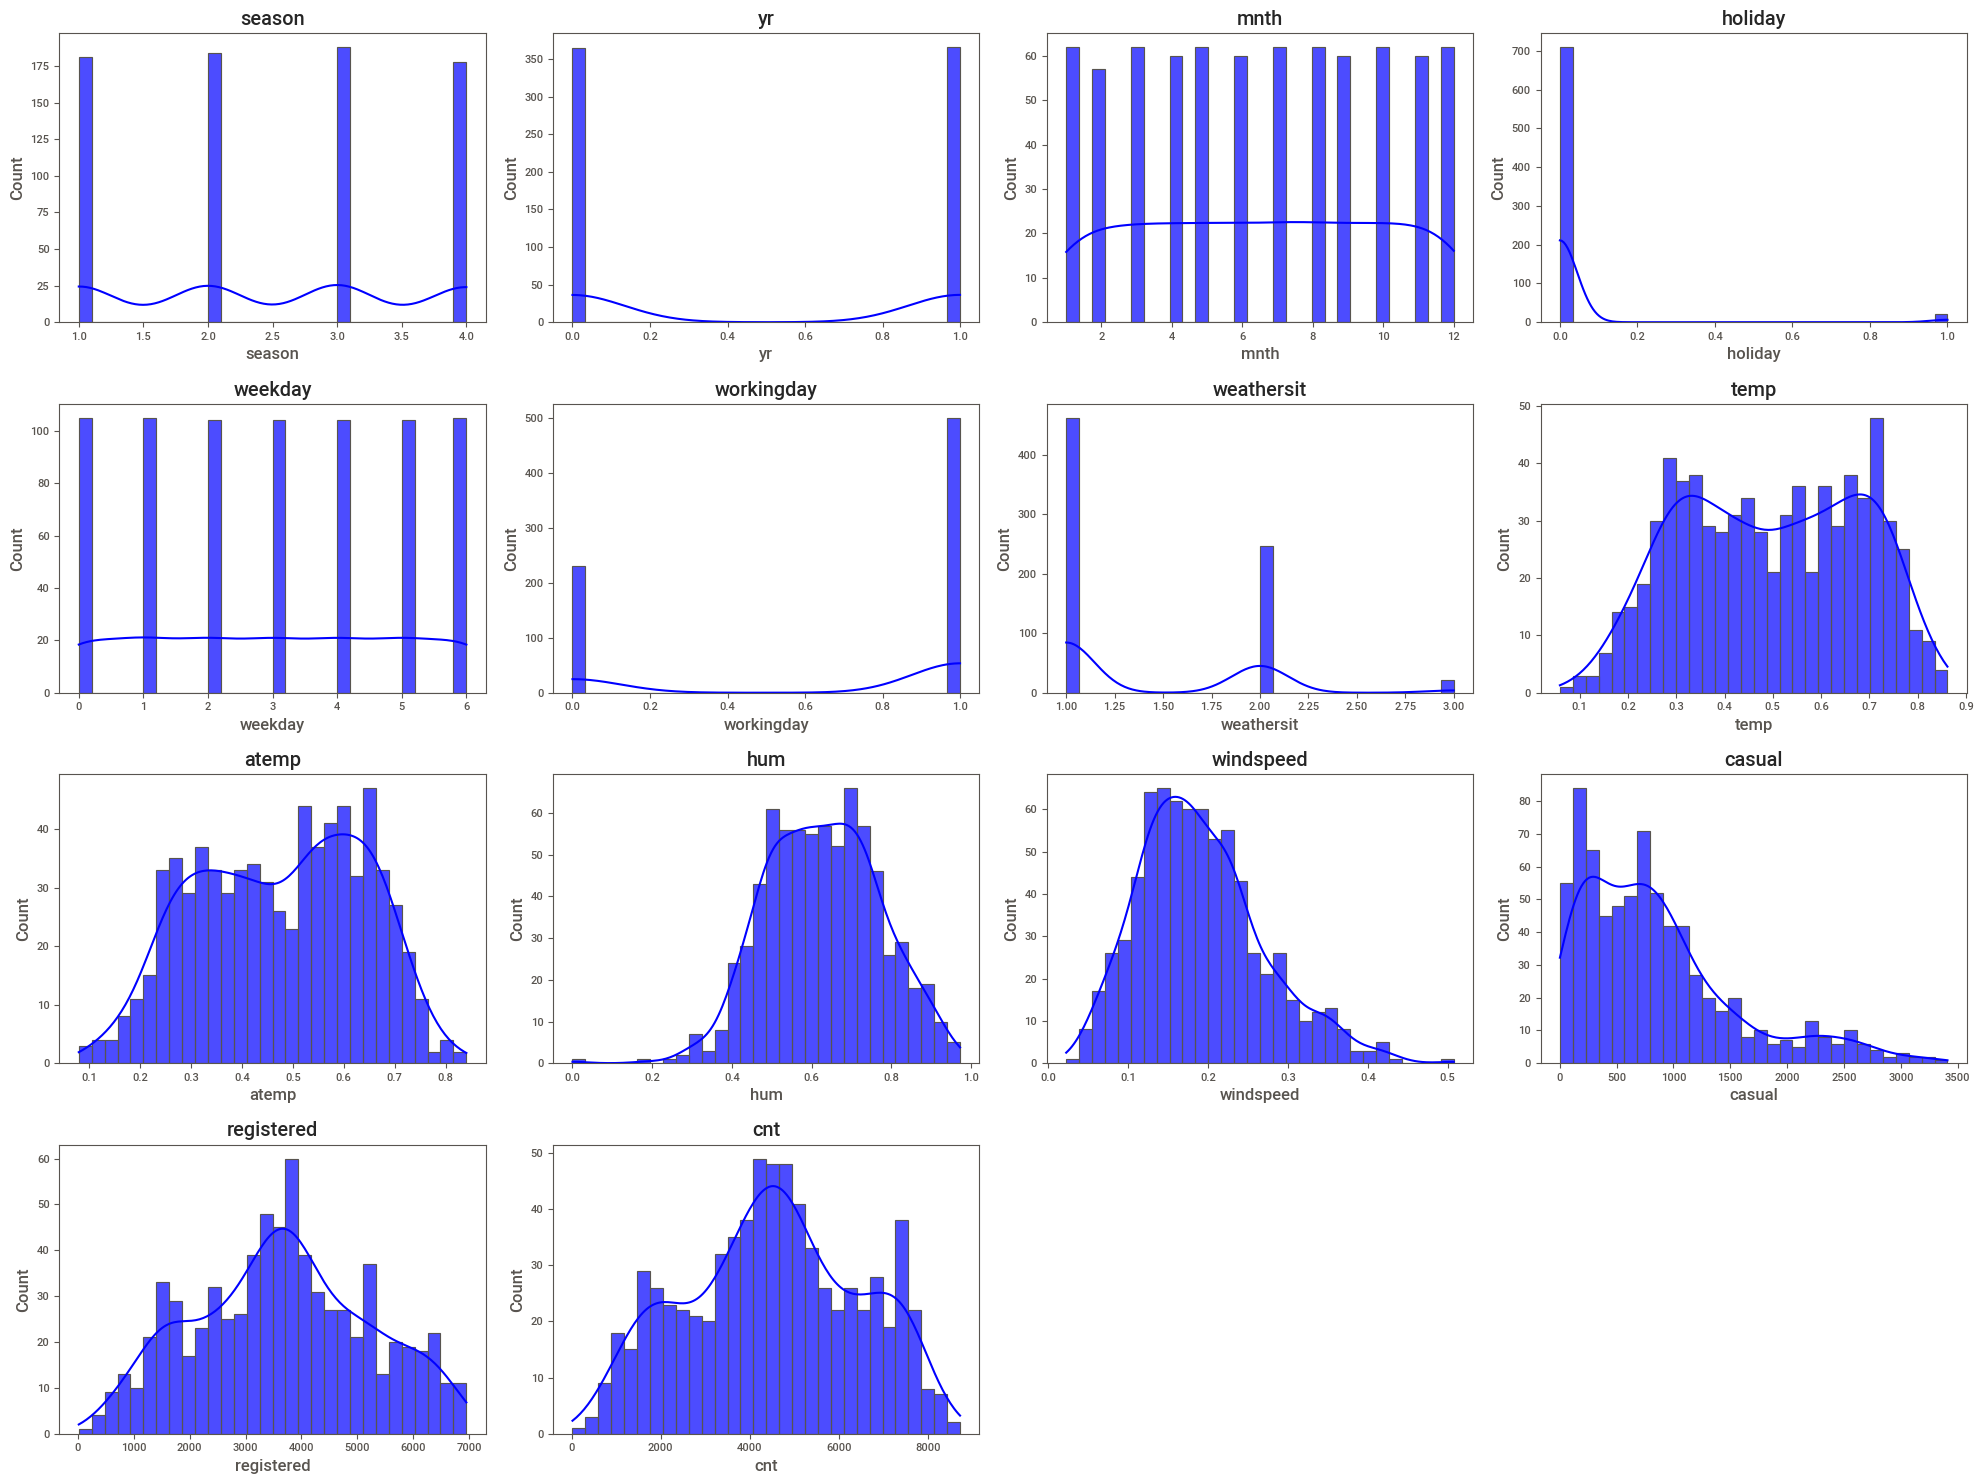

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter Notebooks
%matplotlib inline

# Get the columns of the DataFrame
col = day2.columns

# Set up subplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(col, start=1):
    plt.subplot(4, 4, i)  # Adjust rows/columns as needed (3x3 grid here)
    sns.histplot(data=day2, x=column, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(column)

plt.tight_layout()
plt.show()


holiday is heavily skewed, indicating that most days are not holidays.
workingday shows a clear divide, with a majority of days being workdays.
weathersit:
The most frequent weather condition is category 1 (likely clear or good weather), followed by others in decreasing frequency.
hum (Humidity):
Humidity shows a slight skew, with more days having moderate to high humidity levels.
windspeed:
Windspeed is highly skewed toward lower values, with most days having low windspeed.
casual is highly skewed, indicating most rentals by casual users are low.
registered rentals have a more normal distribution, with a peak in mid-range values.

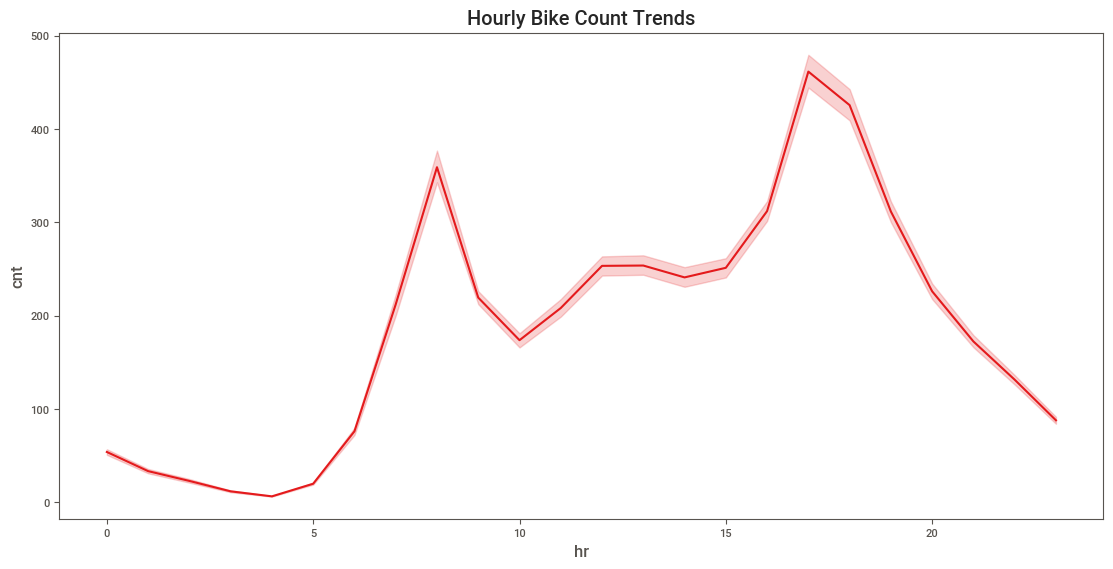

In [396]:

# Line plot for hourly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour, x='hr', y='cnt')
plt.title('Hourly Bike Count Trends')
plt.show()




# from time 15 to 20 Most of the bikes are rented 

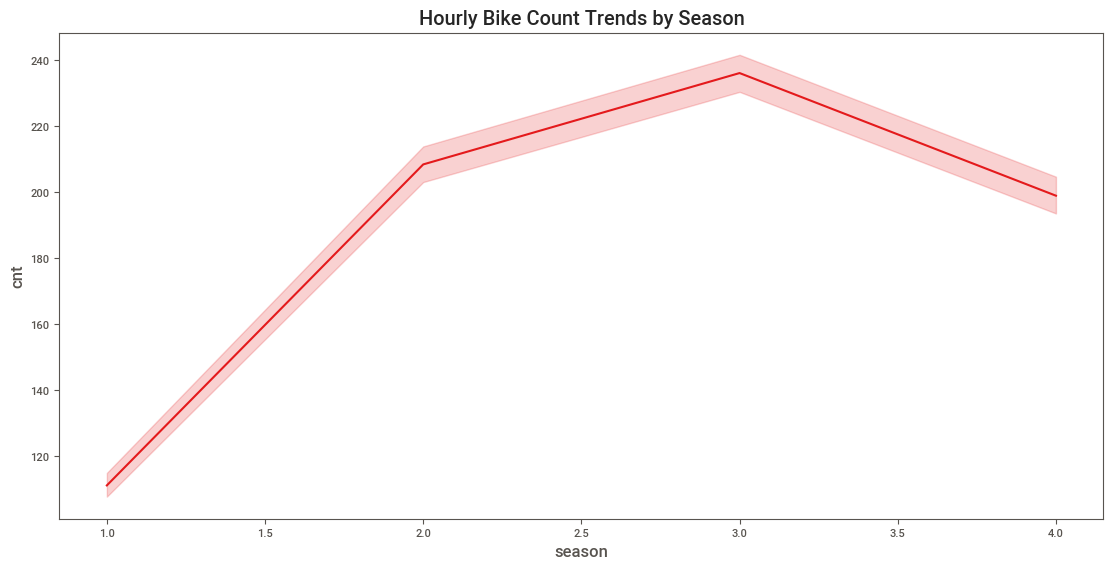

In [398]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour, x='season', y='cnt')
plt.title('Hourly Bike Count Trends by Season') 
plt.show()

Seasonal Variation:

The bike count tends to vary significantly across different seasons.

There is a noticeable increase in bike counts from season 1 to season 3, peaking in season 3.

The bike count decreases in season 4, indicating potentially lower bike usage.

Peak Season:

Season 3 appears to be the peak season for bike usage. This could be due to favorable weather conditions or seasonal events that encourage biking.

Off-Peak Season:

Season 4 shows a decrease in bike counts, possibly due to adverse weather conditions or other factors that discourage biking.

General Trends:

The line plot’s confidence interval (the shaded area around the line) provides an idea of the variability or uncertainty in bike counts. A narrower confidence interval suggests more consistency in the data.

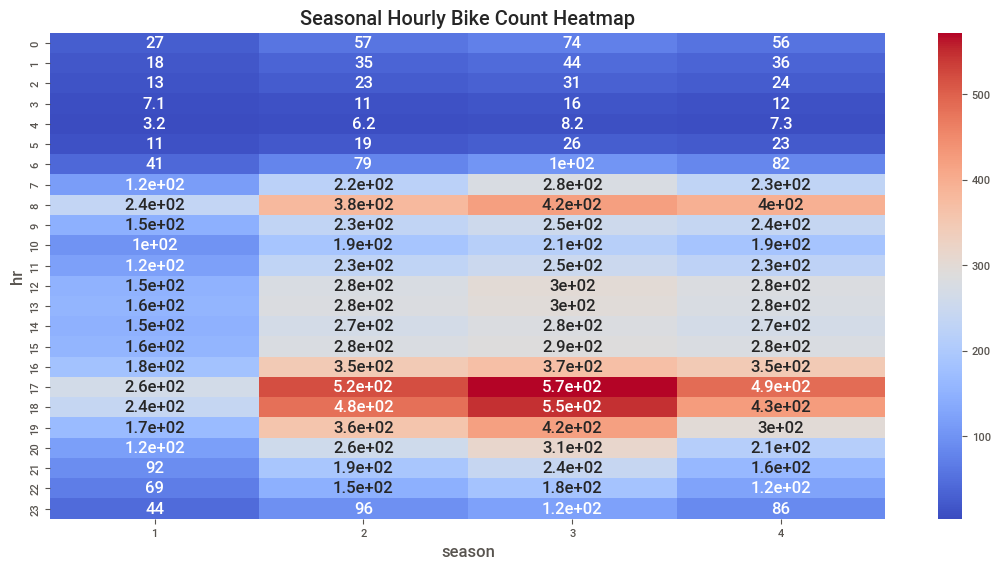

In [400]:


# Heatmap
df_pivot = hour.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)
plt.title('Seasonal Hourly Bike Count Heatmap') 
plt.show()

Peak Hours Across Seasons:

The highest bike counts are observed around the 17th hour (5 PM) across most seasons, particularly season 3.

Morning peak hours, around 8 AM to 9 AM, also show increased bike activity, especially in seasons 1 and 3.

Seasonal Variation:

Season 1: There is a notable increase in bike counts during the morning and evening hours.

Season 2: The bike counts are more evenly distributed throughout the day, with a slight peak around 5 PM.

Season 3: This season shows the highest overall bike counts, with significant peaks around both morning (8-9 AM) and evening (5 PM) hours.

Season 4: Bike counts are generally lower, with less pronounced peaks.

Consistent Patterns:

Across all seasons, there is a consistent pattern of increased bike usage during typical commute times (morning and evening rush hours).

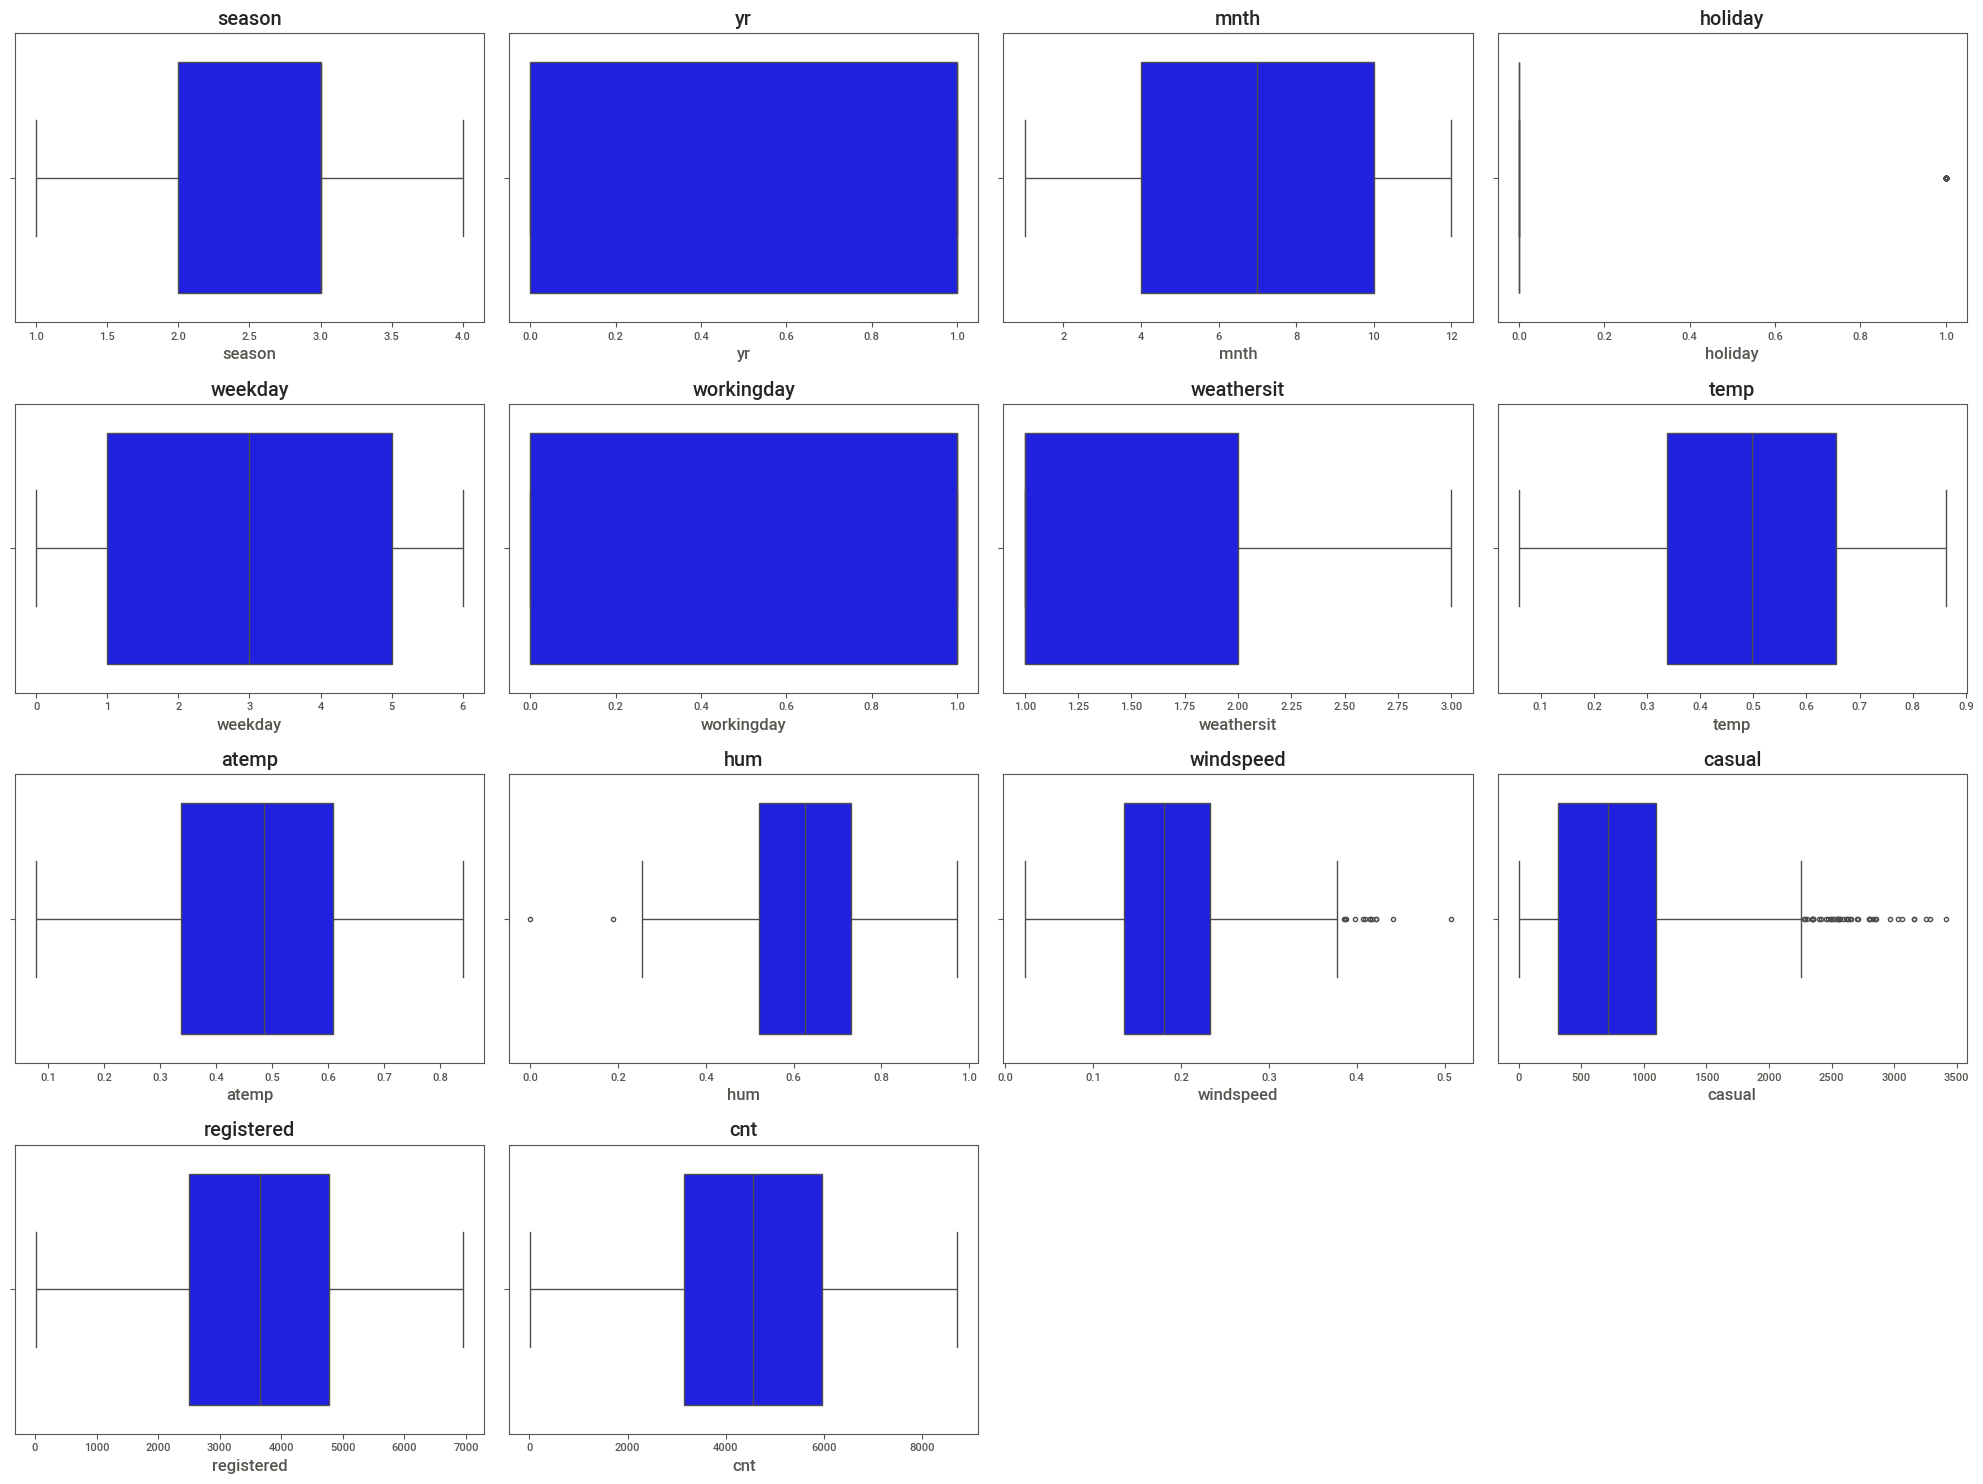

In [402]:
col = day2.columns

# Set up subplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(col, start=1):
    plt.subplot(4, 4, i)  # Adjust rows/columns as needed (3x3 grid here)
    sns.boxplot(data=day2, x=column, color='blue')
    plt.title(column)

plt.tight_layout()

# There are outliers in hum , wind spread 

# outliers 

Log

count    731.000000
mean       0.172294
std        0.064017
min        0.022145
25%        0.126589
50%        0.166340
75%        0.209624
max        0.410428
Name: windspeed_transformed, dtype: float64


<Axes: xlabel='windspeed_transformed'>

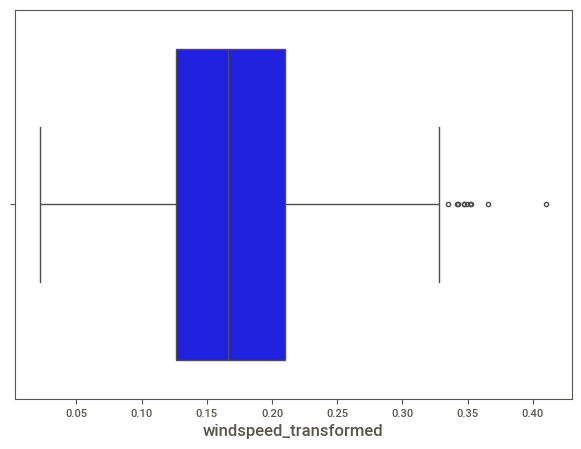

In [406]:


# Assuming 'df' is your DataFrame and 'windspeed' is the column with normalized wind speeds
day2['windspeed_transformed'] = np.log(day2['windspeed'] + 1)

# Check the new distribution
print(day2['windspeed_transformed'].describe())
sns.boxplot(data=day2, x='windspeed_transformed', color='blue')

# applying log doesnt work much 

<Axes: xlabel='hum'>

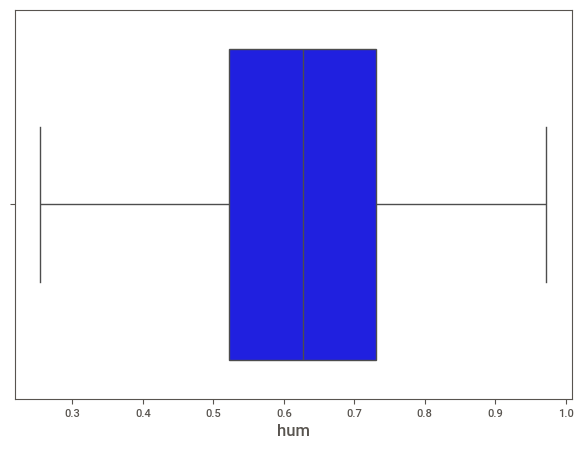

In [408]:


# Calculate IQR
Q1 = day2['hum'].quantile(0.25)
Q3 = day2['hum'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = day2[(day2['hum'] >= lower_bound) & (day2['hum'] <= upper_bound)]

sns.boxplot(data=filtered_df, x='hum', color='blue')


<Axes: xlabel='windspeed'>

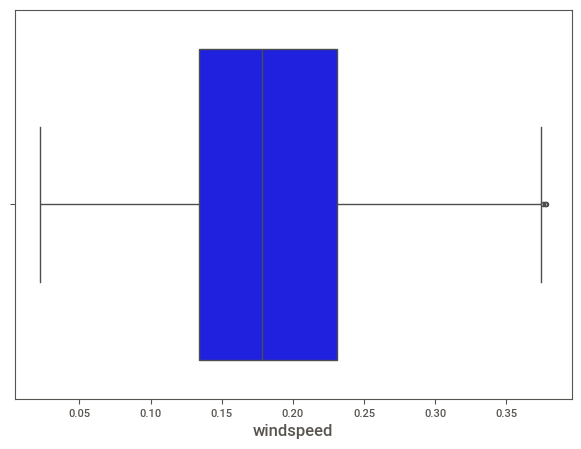

In [409]:

# Calculate IQR
Q1 = filtered_df['windspeed'].quantile(0.25)
Q3 = filtered_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = filtered_df[(filtered_df['windspeed'] >= lower_bound) & (filtered_df['windspeed'] <= upper_bound)]

sns.boxplot(data=filtered_df, x='windspeed', color='blue')

In [410]:
filtered_df.shape

(717, 15)

<Axes: xlabel='mnth', ylabel='cnt'>

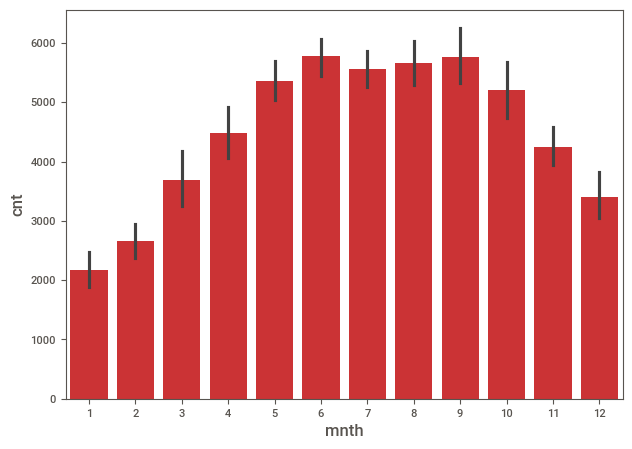

In [411]:
sns.barplot(x='mnth', y='cnt', data=day)

<Axes: xlabel='season', ylabel='cnt'>

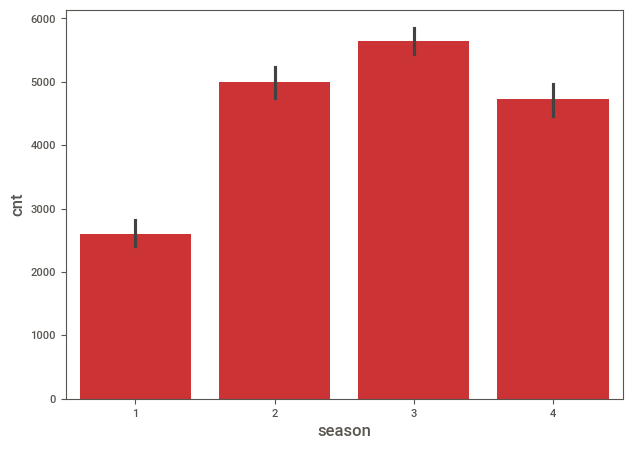

In [412]:
sns.barplot(x='season', y='cnt', data=day)

<Axes: xlabel='weathersit', ylabel='cnt'>

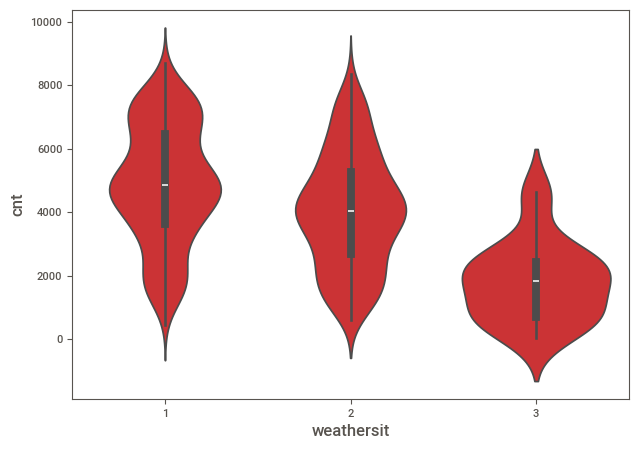

In [413]:
sns.violinplot(x='weathersit', y='cnt', data=day)


Peak Hours:

Morning Rush: There's a noticeable increase in bike counts around the morning rush hours (8-9 AM). This suggests many people prefer biking to work or school in the morning.

Evening Peak: Another peak occurs in the evening, around 5-6 PM. This indicates a high usage of bikes for commuting back home.

Seasonal Variations:

Season 1 (e.g., Winter): The bike counts are relatively lower during this season, especially during the colder hours of the day.

Season 2 (e.g., Spring): The bike counts start increasing, with a more consistent use throughout the day.

Season 3 (e.g., Summer): This season shows the highest bike counts, with significant peaks in both the morning and evening hours.

Season 4 (e.g., Fall): Bike counts decrease slightly compared to summer but remain higher than winter.

Weather Impact:

Good Weather: Bike counts are higher in favorable weather conditions, which is consistent with the peaks observed in seasons with more pleasant weather.

Adverse Weather: During adverse weather conditions (e.g., season 1), bike usage drops, indicating that weather has a significant impact on biking behavior.

<Axes: xlabel='workingday', ylabel='cnt'>

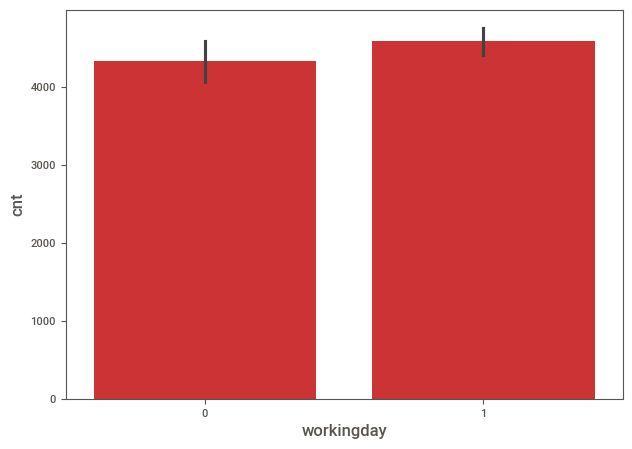

In [415]:
sns.barplot(x='workingday', y='cnt', data=day)


1) Bike counts are significantly higher on non-working days
2)Bike counts are lower on working days

<Axes: xlabel='weekday', ylabel='cnt'>

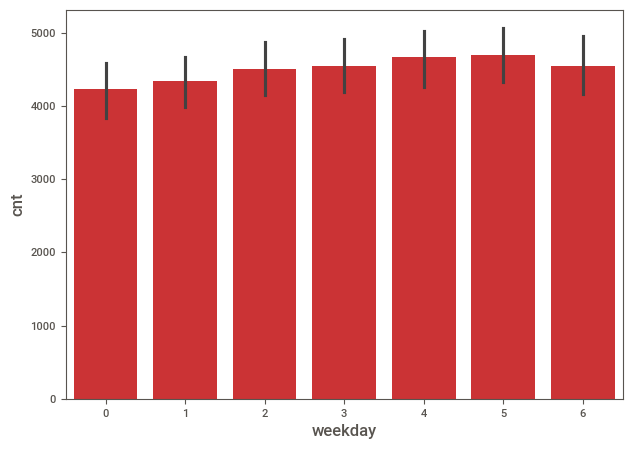

In [417]:
sns.barplot(x='weekday', y='cnt', data=day)


1) The bike counts are relatively consistent across all days of the week, with values ranging from around 4000 to 5000.

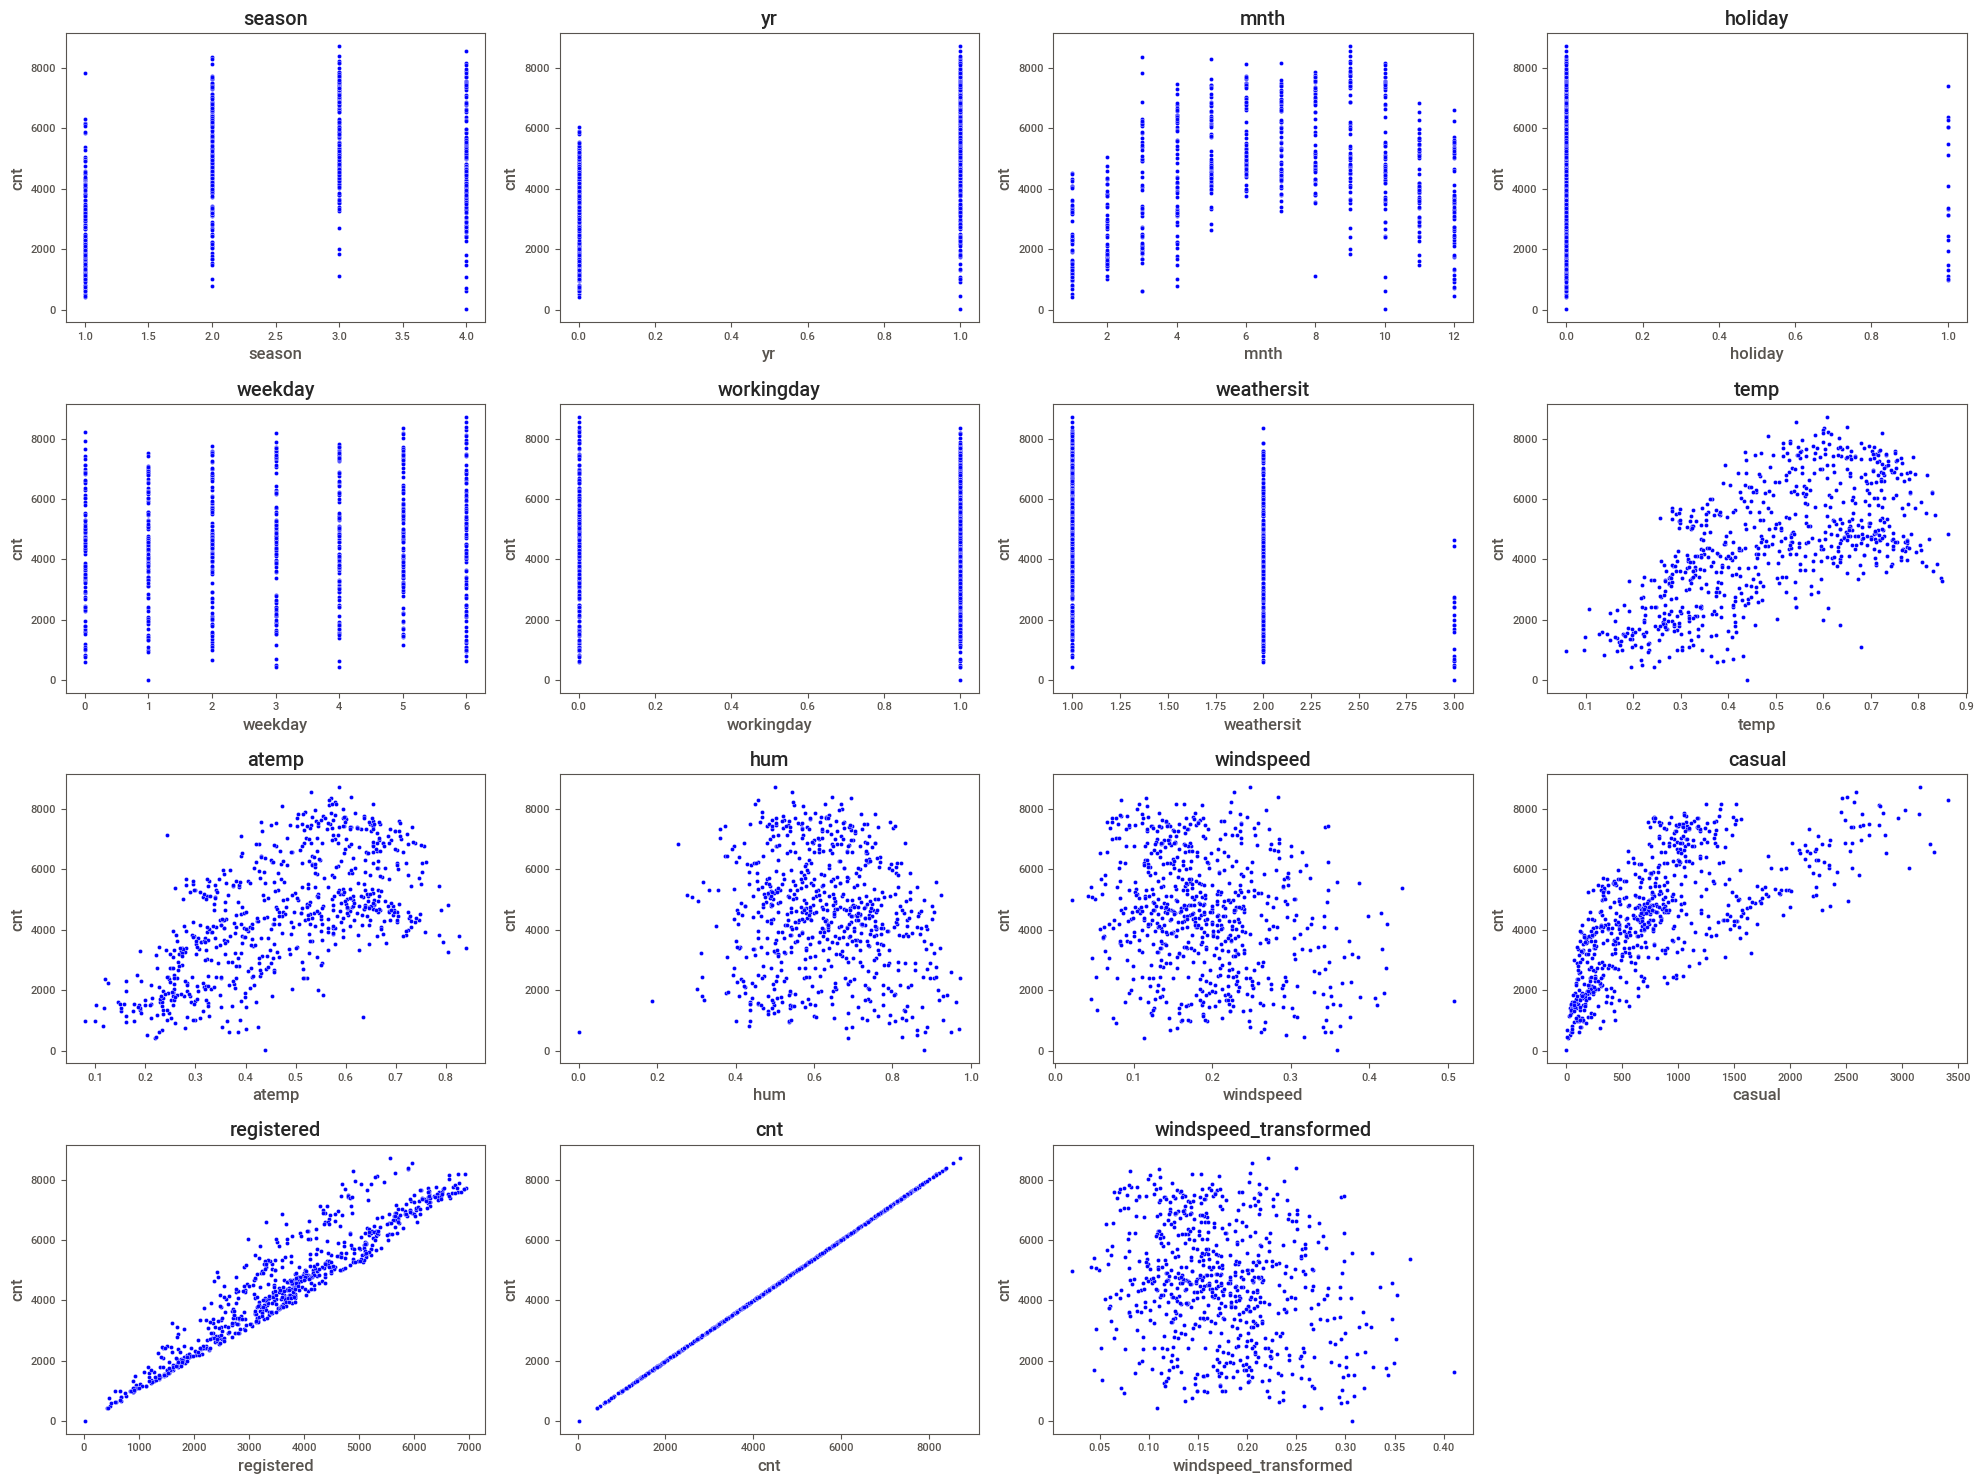

In [419]:

col = day2.columns

# Set up subplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(col, start=1):
    plt.subplot(4, 4, i)  # Adjust rows/columns as needed (3x3 grid here)
    sns.scatterplot(data=day2, x=column, y='cnt',color='blue')
    plt.title(column)

plt.tight_layout()

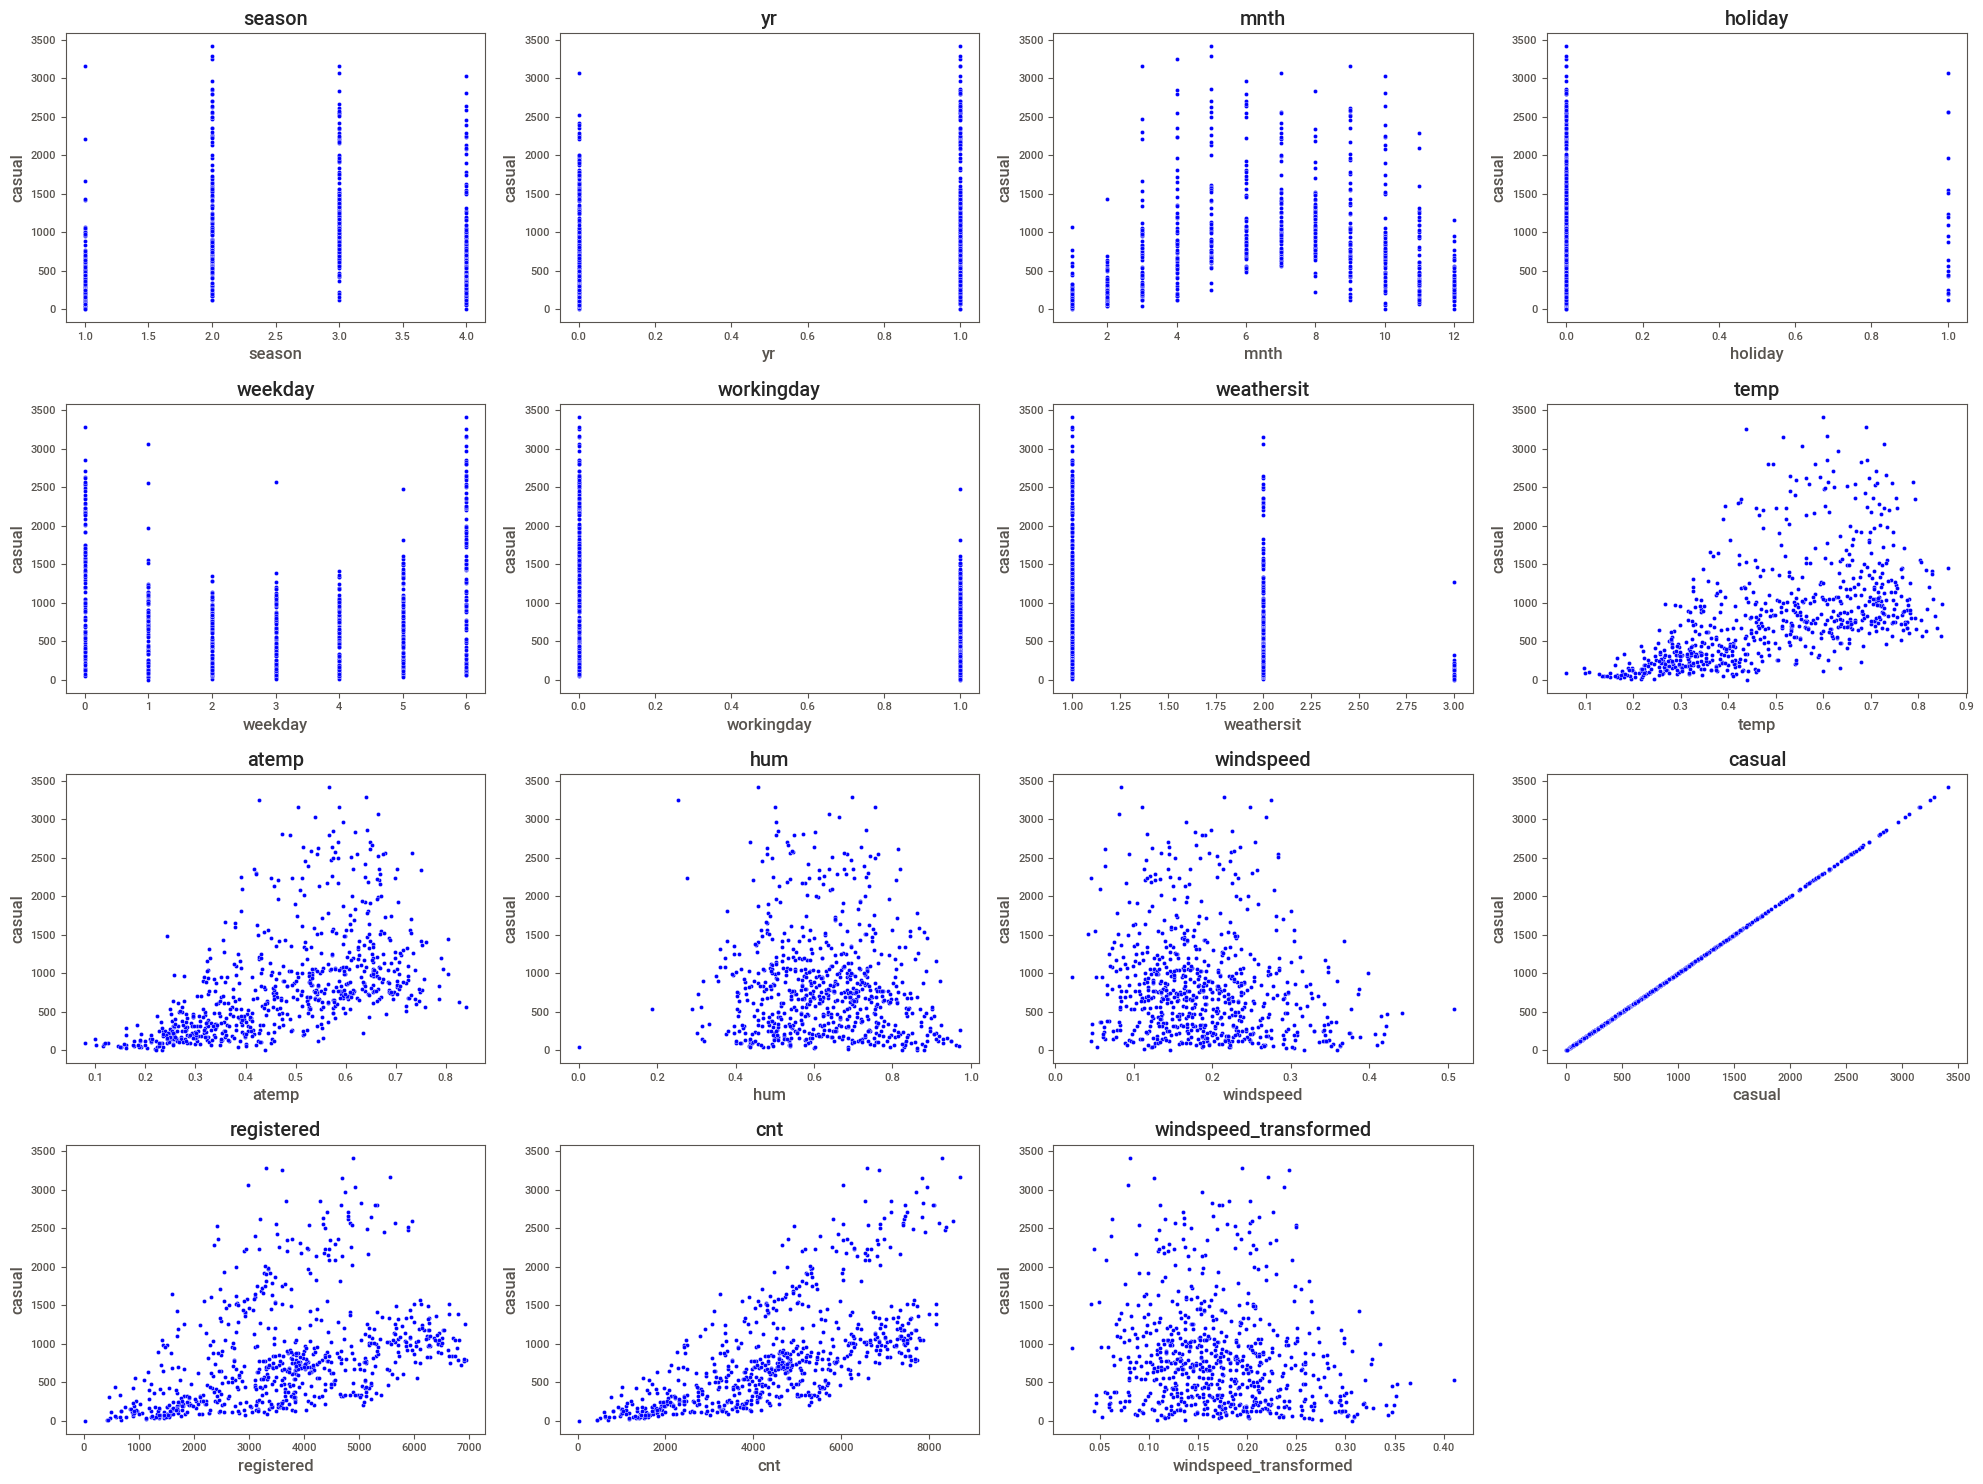

In [420]:

col = day2.columns

# Set up subplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(col, start=1):
    plt.subplot(4, 4, i)  # Adjust rows/columns as needed (3x3 grid here)
    sns.scatterplot(data=day2, x=column, y='casual',color='blue')
    plt.title(column)

plt.tight_layout()

There us no Much good relation 

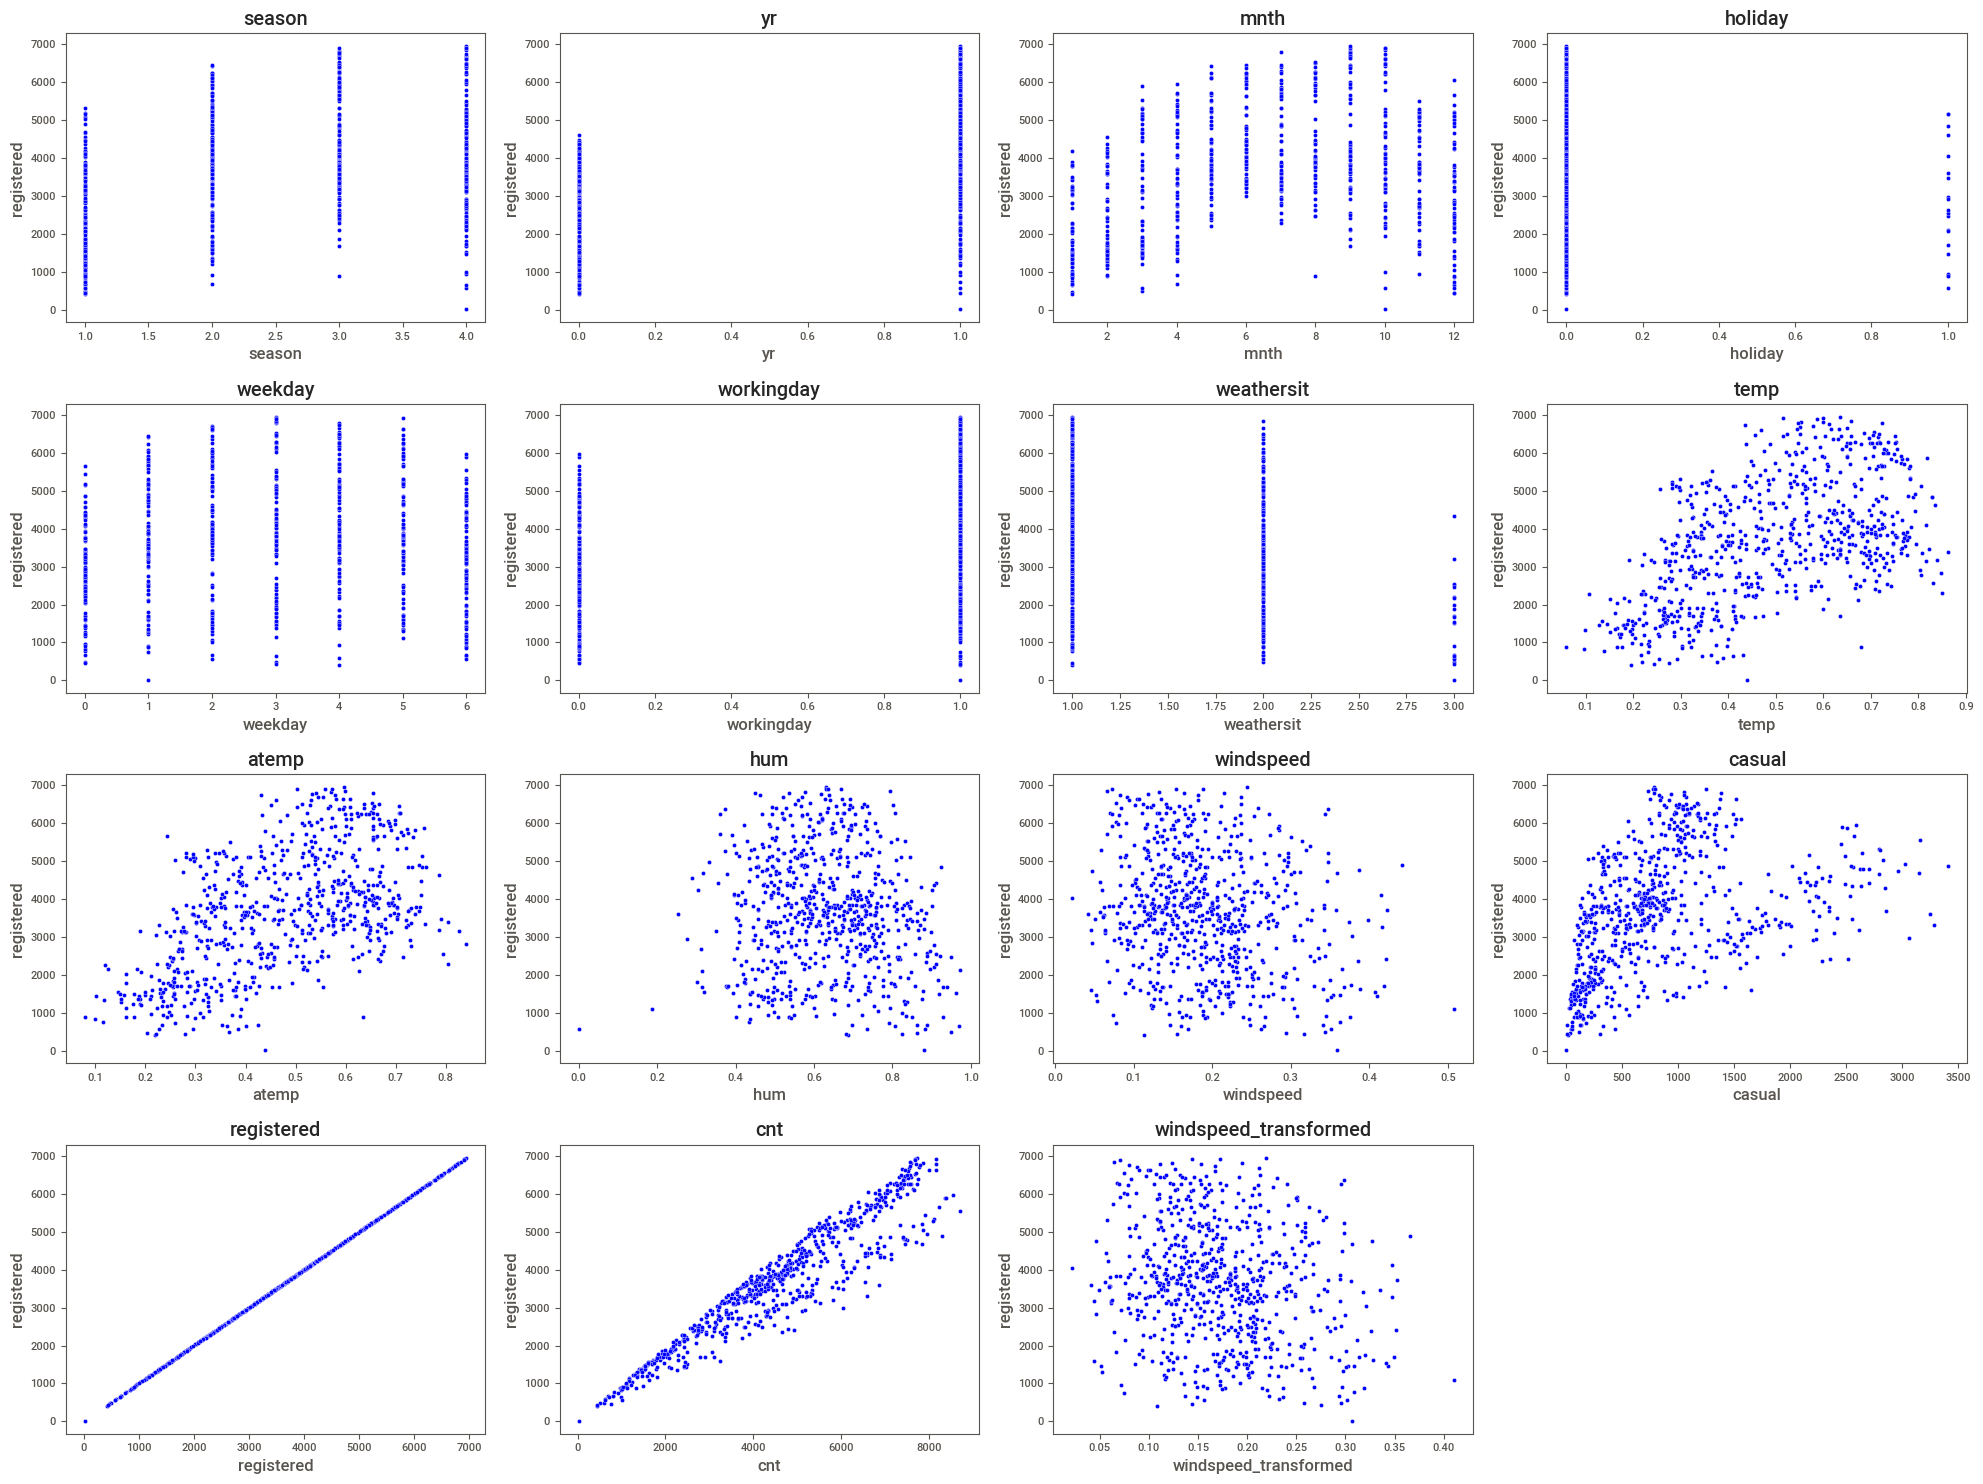

In [422]:

col = day2.columns

# Set up subplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(col, start=1):
    plt.subplot(4, 4, i)  # Adjust rows/columns as needed (3x3 grid here)
    sns.scatterplot(data=day2, x=column, y='registered',color='blue')
    plt.title(column)

plt.tight_layout()

<Axes: >

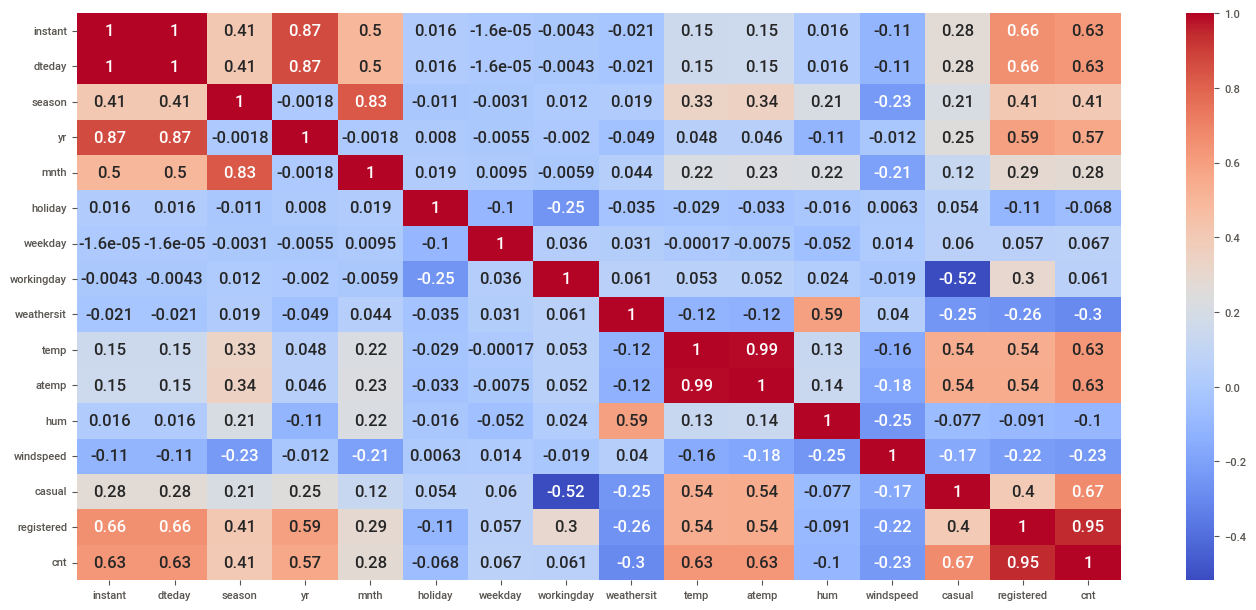

In [423]:
corr_matrix = day.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [424]:
filtered_df.yr.unique()

array([0, 1], dtype=int64)

In [425]:
filtered_df.shape

(717, 15)

In [426]:
filtered_df

season  yr  mnth  holiday  weekday  workingday  weathersit    temp    \
0       1     0    1      0        6          0           2      0.344167   
1       1     0    1      0        0          0           2      0.363478   
2       1     0    1      0        1          1           1      0.196364   
3       1     0    1      0        2          1           1      0.200000   
4       1     0    1      0        3          1           1      0.226957   
..      ...  ..   ...      ...      ...         ...         ...       ...   
726     1     1   12      0        4          1           2      0.254167   
727     1     1   12      0        5          1           2      0.253333   
728     1     1   12      0        6          0           2      0.253333   
729     1     1   12      0        0          0           1      0.255833   
730     1     1   12      0        1          1           2      0.215833   

       atemp      hum    windspeed  casual  registered   cnt  \
0    0.363625  0.805833  0.160446     331       654      985   
1    0.353739  0.696087  0.248539     131       670      801   
2    0.189405  0.437273  0.248309     120      1229     1349   
3    0.212122  0.590435  0.160296     108      1454     1562   
4    0.229270  0.436957  0.186900      82      1518     1600   
..        ...       ...        ...     ...         ...   ...   
726  0.226642  0.652917  0.350133     247      1867     2114   
727  0.255046  0.590000  0.155471     644      2451     3095   
728  0.242400  0.752917  0.124383     159      1182     1341   
729  0.231700  0.483333  0.350754     364      1432     1796   
730  0.223487  0.577500  0.154846     439      2290     2729   

     windspeed_transformed  
0          0.148804         
1          0.221974         
2          0.221790         
3          0.148675         
4          0.171345         
..                     ...  
726        0.300203         
727        0.144508         
728        0.117234         
729        0.300663         
730        0.143967         

[717 rows x 15 columns]

In [427]:
filtered_df.drop('windspeed_transformed',axis=1,inplace=True)

<Axes: >

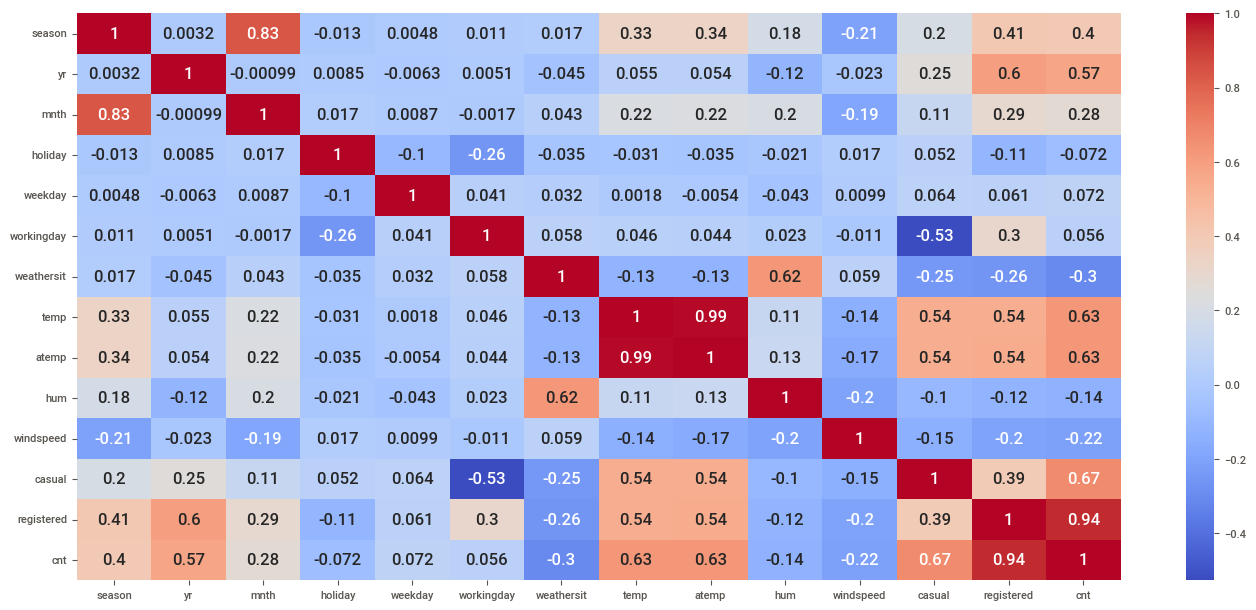

In [428]:
corr_matrix = filtered_df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [467]:
filtered_df.cnt.unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1815, 2115, 2475, 2927, 1812, 1107, 1450, 1917, 1807, 1461, 1969,
       2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872, 2133, 1891,
       1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239, 3117, 2471, 2703,
       2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536, 2227, 2252, 3249,
       2808, 3141, 1471, 2455, 2895, 3348, 2034, 2162, 3267, 3126,  795,
       3744, 3429, 3204, 3944, 4189, 1683, 4036, 4191, 4073, 4400, 3872,
       4058, 4595, 5312, 3351, 4401, 4451, 2633, 4433, 4608, 4714, 4333,
       4362, 4803, 4182, 4864, 4105, 3409, 4553, 3958, 4123, 3855, 4575,
       4917, 5805, 4660, 4274, 4492, 4978, 4677, 4679, 4758, 4788, 4098,
       3982, 3974, 4968, 5342, 4906, 4548, 4833, 39

In [431]:
y=filtered_df.cnt

In [295]:
X=filtered_df.drop(['cnt','registered','casual','atemp','workingday'],axis=1)

In [223]:
#filtered_df['wind_chill'] = 13.12 + 0.6215 * filtered_df['temp'] - 11.37 * (filtered_df['windspeed']**0.16) + 0.3965 * filtered_df['temp'] * (filtered_df['windspeed']**0.16)


In [297]:
X

season  yr  mnth  holiday  weekday  weathersit    temp       hum    \
0       1     0    1      0        6          2      0.344167  0.805833   
1       1     0    1      0        0          2      0.363478  0.696087   
2       1     0    1      0        1          1      0.196364  0.437273   
3       1     0    1      0        2          1      0.200000  0.590435   
4       1     0    1      0        3          1      0.226957  0.436957   
..      ...  ..   ...      ...      ...         ...       ...       ...   
726     1     1   12      0        4          2      0.254167  0.652917   
727     1     1   12      0        5          2      0.253333  0.590000   
728     1     1   12      0        6          2      0.253333  0.752917   
729     1     1   12      0        0          1      0.255833  0.483333   
730     1     1   12      0        1          2      0.215833  0.577500   

     windspeed  wind_chill  
0    0.160446    4.951484   
1    0.248539    4.361616   
2    0.248309    4.206063   
3    0.160296    4.820491   
4    0.186900    4.635896   
..         ...         ...  
726  0.350133    3.750634   
727  0.155471    4.910430   
728  0.124383    5.203823   
729  0.350754    3.749526   
730  0.154846    4.881483   

[717 rows x 10 columns]

In [225]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 717, dtype: int64

# Model Creation

In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

# Standardizing the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Dictionary to store results
results = {}

# Training and evaluating all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Print the results
print("Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f" - Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
    print(f" - Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f" - R-squared (R2): {metrics['R2']:.4f}")

# Determine the best model based on R2 score
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"\nThe best model for production is: {best_model}")


Model Performance:

Linear Regression:
 - Mean Absolute Error (MAE): 615.3924
 - Mean Squared Error (MSE): 698312.5652
 - R-squared (R2): 0.8146

Decision Tree:
 - Mean Absolute Error (MAE): 622.8194
 - Mean Squared Error (MSE): 875206.3611
 - R-squared (R2): 0.7676

Random Forest:
 - Mean Absolute Error (MAE): 425.8419
 - Mean Squared Error (MSE): 464112.3280
 - R-squared (R2): 0.8768

Gradient Boosting:
 - Mean Absolute Error (MAE): 389.6148
 - Mean Squared Error (MSE): 322058.5875
 - R-squared (R2): 0.9145

SVR:
 - Mean Absolute Error (MAE): 1597.3893
 - Mean Squared Error (MSE): 3717720.5559
 - R-squared (R2): 0.0129

The best model for production is: Gradient Boosting


my best two models  are 
Gradient Boosting and Random Forest  I will go further with them 

# Model Evaluation

In [230]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Gradient Boosting
cv_scores = cross_val_score(RandomForestRegressor(), X, y, cv=10, scoring='r2')
print(f"Cross-Validation R2 scores: {cv_scores}")
print(f"Mean R2 score: {cv_scores.mean()}")


Cross-Validation R2 scores: [-2.36911877  0.5856663   0.09403054  0.20820543  0.28146064  0.37729859
  0.33047648  0.07931546  0.39410771  0.62239212]
Mean R2 score: 0.06038345056592846


 # Hyperparameter Tuning

In [275]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,],
     'learning_rate': [ 0.01, 0.05, 0.1,],
    'max_depth': [3, 4, 5]
    
}

# Initialize the model
gb_reg = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

print(f"Optimized Gradient Boosting: MAE={mean_absolute_error(y_test, y_pred)}, MSE={mean_squared_error(y_test, y_pred)}, R2={r2_score(y_test, y_pred)}")


Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Optimized Gradient Boosting: MAE=424.06021632854845, MSE=361536.36918371805, R2=0.9040094688497586


In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_reg = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"Optimized Random Forest: MAE={mean_absolute_error(y_test, y_pred)}, MSE={mean_squared_error(y_test, y_pred)}, R2={r2_score(y_test, y_pred)}")


Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Optimized Random Forest: MAE=1016.0325859025704, MSE=1386958.2472236124, R2=0.6317525145954304


# Conclusion:


In [ ]:
The GradientBoostingRegressor is performing well with 91.45 accuracy so we go with This Algorithm 